In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

### **Auth Google**

In [ ]:
from google.colab import auth
auth.authenticate_user()

from rich.console import Console
console = Console()

In [ ]:
project_id = 'devhack-3f0c2'
dataset_name = "soildataset"
table_name = "soil_data"
location = "us-central1"
client = bigquery.Client(project=project_id)

### **Obtenemos los datos de GCP Cloud Storage**

### **Extracción y limpieza del primer dataset Soil Data Grevena**
- https://www.kaggle.com/datasets/jocelyndumlao/soil-data-grevena

In [ ]:
df_soil_data_grevena = pd.read_excel("gs://uao-etl-storage/soil_data_grevena.xlsx")

In [ ]:
df_soil_data_grevena.head()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
0,1,42.0,38.0,20.0,5.162,0.274,3.783414,0.00,14.462366,18.608840,147,1115,91.32,0.894,27.06,1.768,0.40
1,2,54.0,26.0,20.0,6.071,0.355,1.451688,0.00,14.587814,32.742137,180,1055,60.04,3.660,17.58,1.684,0.41
2,3,28.0,36.0,36.0,6.921,0.675,1.767599,0.40,14.910394,19.024525,183,1215,61.24,3.060,18.00,1.840,0.46
3,4,58.0,20.0,22.0,7.704,0.355,0.718322,6.80,4.211470,6.276846,116,327,19.54,1.640,5.04,0.844,0.50
4,5,33.2,41.2,25.6,7.609,0.392,0.996625,4.39,6.111111,6.553970,228,939,25.84,0.180,7.16,1.216,0.40


**Descripción de las variables de la base de datos Soil Data Grevena:**
* Sand%: Porcentaje del contenido de arenas en el suelo
* Clay%: Porcentaje del contenido de arcillas en el suelo
* Silt%: Porcentaje del contenido de limos en el suelo
* pH: medida de acidez o alcalinidad del suelo
* EC ms/cm: Conductividad eléctrica, es la capacidad del suelo para conducir
* corriente eléctrica a través de los iones disueltos en el suelo
* OM%: Materia orgánica en el suelo
* CACO3%: Carbonato de calcio, neutralizador de acidez
* N_NO3 ppm: Nitrato derivado del nitrógeno en el suelo
* P ppm: Fósforo en el suelo
* K ppm: Potasio en el suelo
* Mg ppm: Magnesio en el suelo
* Fe ppm: Hierro en el suelo
* Zn ppm: Zinc en el suelo
* Mn ppm: Manganeso en el suelo
* Cu ppm: Cobre en el suelo
* B ppm: Boro en el suelo



In [ ]:
df_soil_data_grevena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         781 non-null    int64  
 1   Sand %     781 non-null    float64
 2   Clay %     781 non-null    float64
 3   Silt %     781 non-null    float64
 4   pH         781 non-null    float64
 5   EC mS/cm   781 non-null    float64
 6   O.M. %     781 non-null    float64
 7   CACO3 %    781 non-null    float64
 8   N_NO3 ppm  781 non-null    float64
 9   P ppm      781 non-null    float64
 10  K ppm      781 non-null    int64  
 11  Mg ppm     781 non-null    int64  
 12  Fe ppm     781 non-null    float64
 13  Zn ppm     781 non-null    float64
 14  Mn ppm     780 non-null    float64
 15  Cu ppm     781 non-null    float64
 16  B ppm      781 non-null    float64
dtypes: float64(14), int64(3)
memory usage: 103.9 KB


In [ ]:
df_soil_data_grevena.describe()

,ID,Sand %,Clay %,Silt %,pH,EC mS/cm,O.M. %,CACO3 %,N_NO3 ppm,P ppm,K ppm,Mg ppm,Fe ppm,Zn ppm,Mn ppm,Cu ppm,B ppm
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,780.000000,781.000000,781.000000
mean,391.000000,31.529321,34.997183,33.473496,7.133668,0.452793,2.028909,13.422049,11.623384,13.840659,296.226633,821.025608,31.203376,0.674741,15.870457,2.031440,0.383825
std,225.599572,10.978371,11.252452,8.384172,0.897823,0.304841,0.627244,13.381635,11.052054,14.586017,194.461073,742.228950,26.013791,0.680825,15.169155,2.455702,0.222067
min,1.000000,10.000000,6.000000,14.000000,4.490000,0.134000,0.370000,0.000000,0.180000,1.070000,31.000000,60.000000,4.630000,0.100000,2.380000,0.210000,0.100000
25%,196.000000,24.000000,28.000000,28.000000,6.660000,0.338000,1.590000,1.800000,5.280000,5.730000,169.000000,364.000000,13.210000,0.310000,6.749250,1.080000,0.230000
50%,391.000000,30.000000,36.000000,32.000000,7.550000,0.404000,1.960000,8.710000,8.850000,9.490000,255.000000,568.000000,19.870000,0.480000,10.105000,1.480000,0.350000
75%,586.000000,38.000000,44.000000,38.000000,7.780000,0.497000,2.370000,22.000000,14.310000,15.980000,358.000000,1010.000000,43.150000,0.771000,19.162500,2.130000,0.480000
max,781.000000,70.000000,64.000000,68.000000,8.200000,5.621000,4.980000,77.600000,120.640000,152.420000,1665.000000,4836.000000,187.940000,7.090000,189.210000,33.910000,1.900000


In [ ]:
df_soil_data_grevena_clean = df_soil_data_grevena.copy()

In [ ]:
df_soil_data_grevena_clean.columns

Index(['ID', 'Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %',
       'CACO3 %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm',
       'Mn ppm', 'Cu ppm', 'B ppm'],
      dtype='object')

In [ ]:
df_soil_data_grevena_clean.drop(columns=['ID', 'EC mS/cm', 'N_NO3 ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm', 'Cu ppm', 'B ppm'], inplace=True)

In [ ]:
df_soil_data_grevena_clean.duplicated().sum()

np.int64(0)

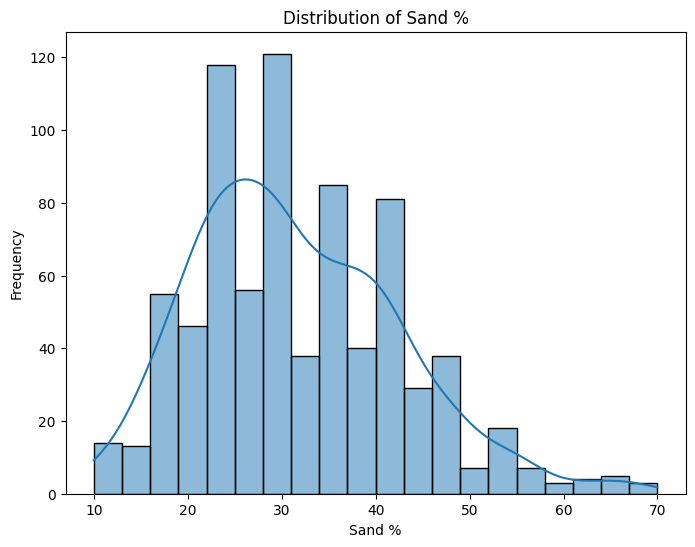

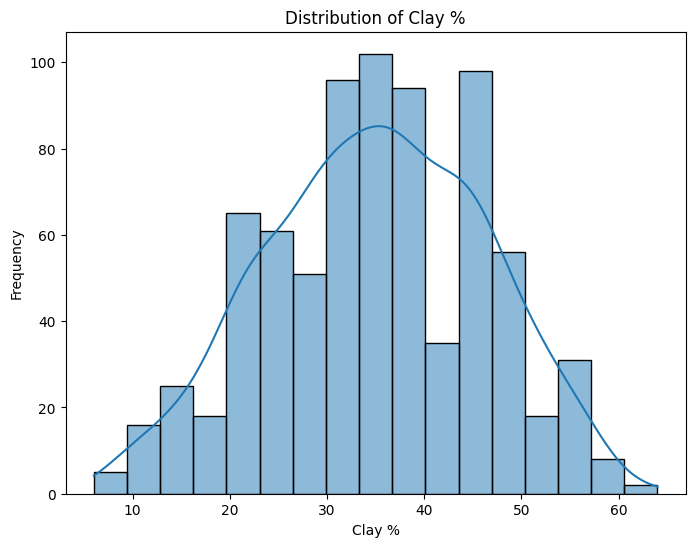

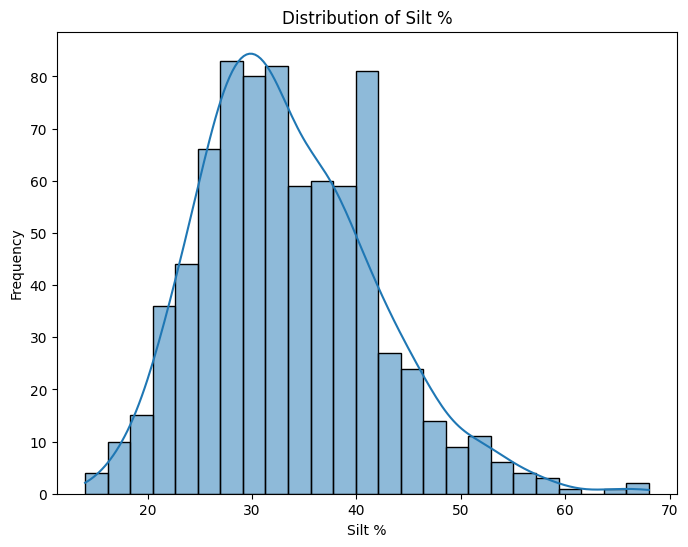

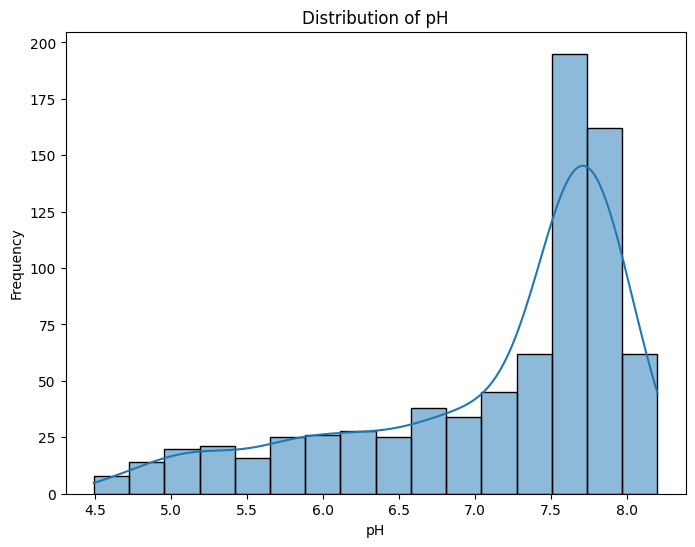

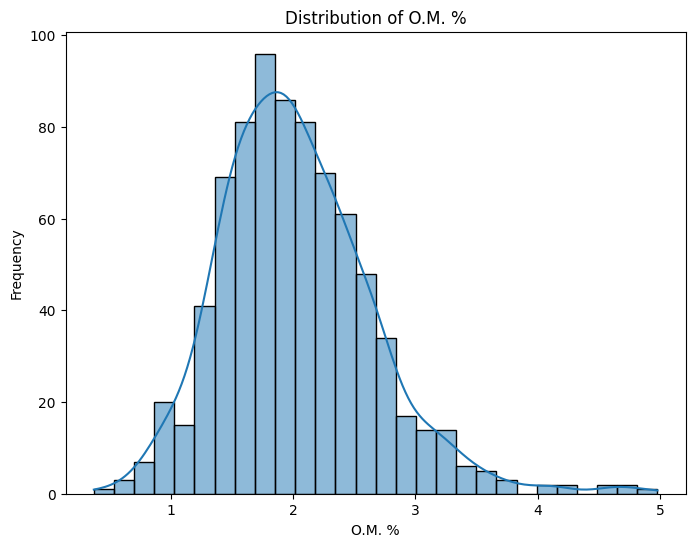

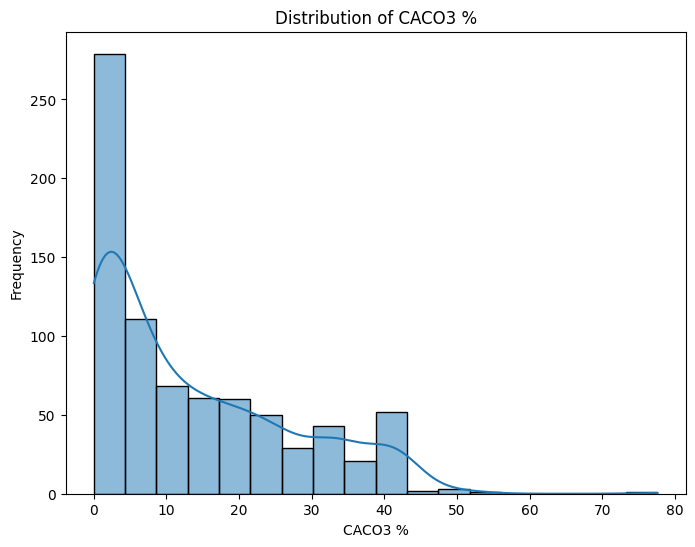

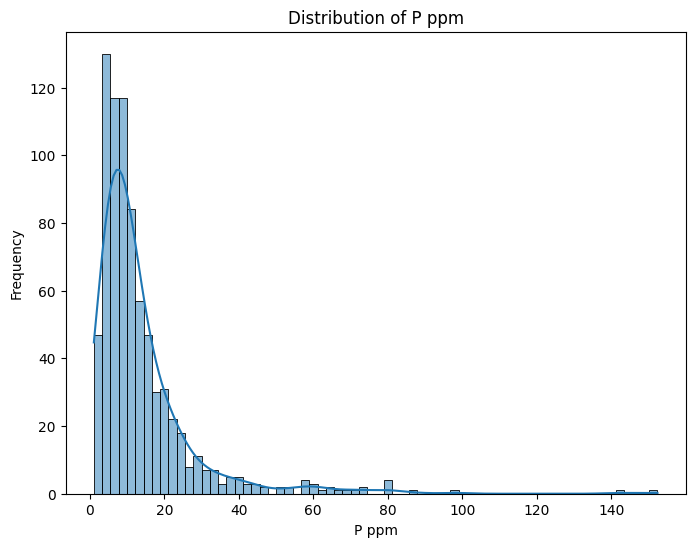

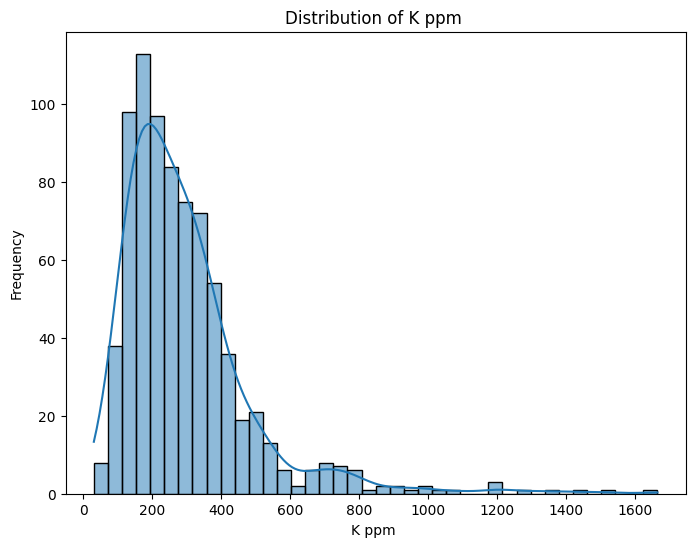

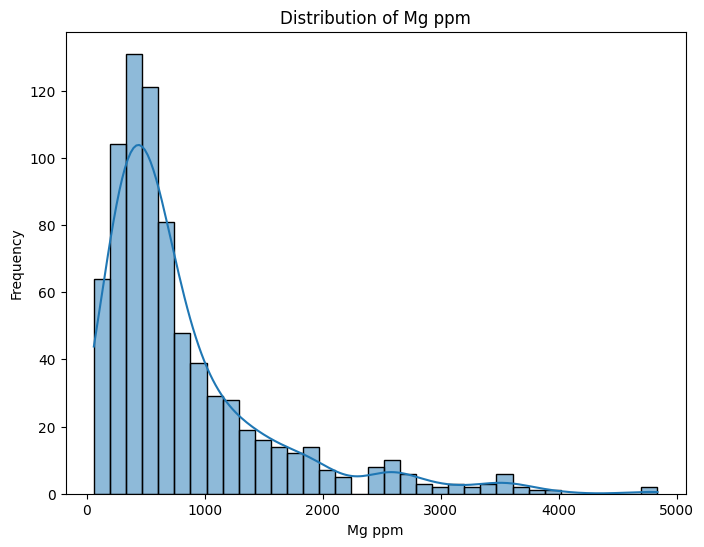

In [ ]:
columns = df_soil_data_grevena_clean.columns
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_soil_data_grevena[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


### **Revisamos Outliers**

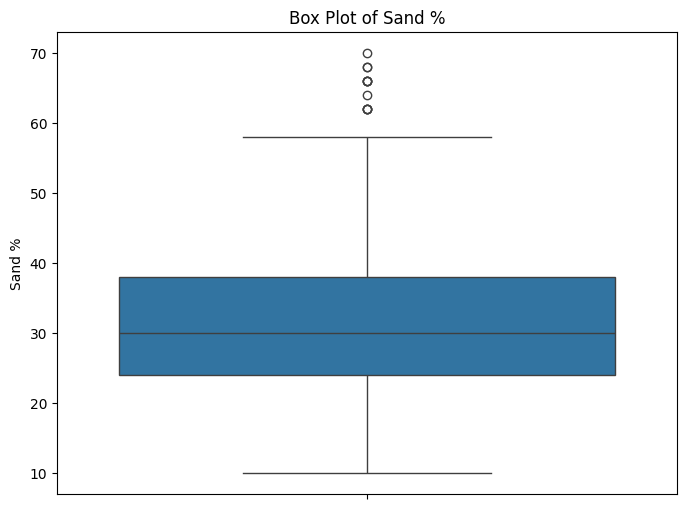

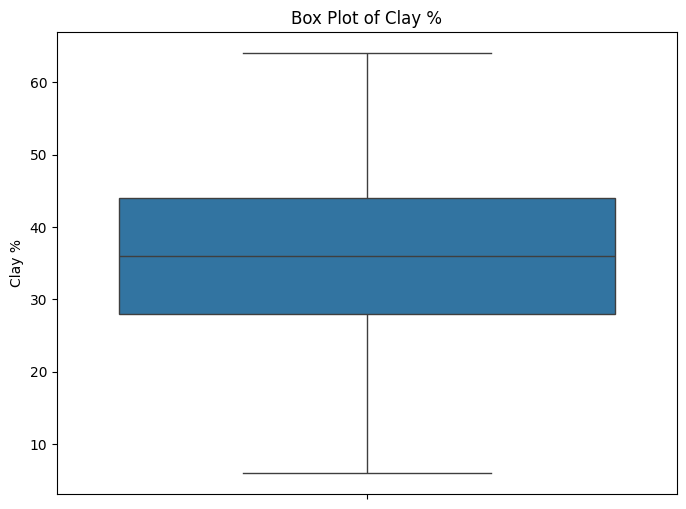

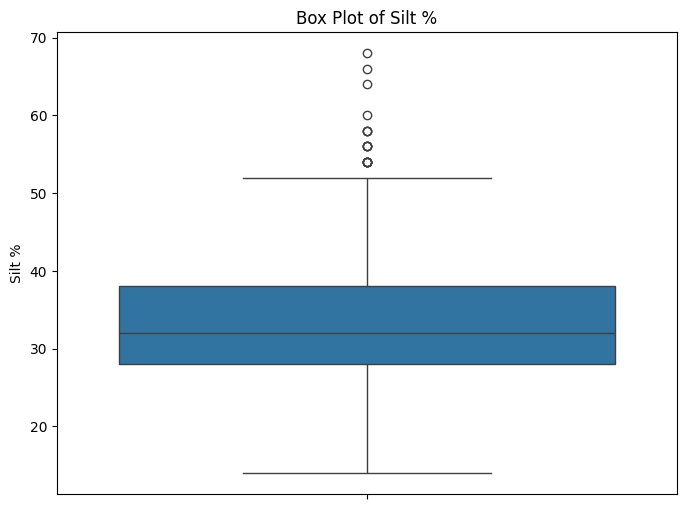

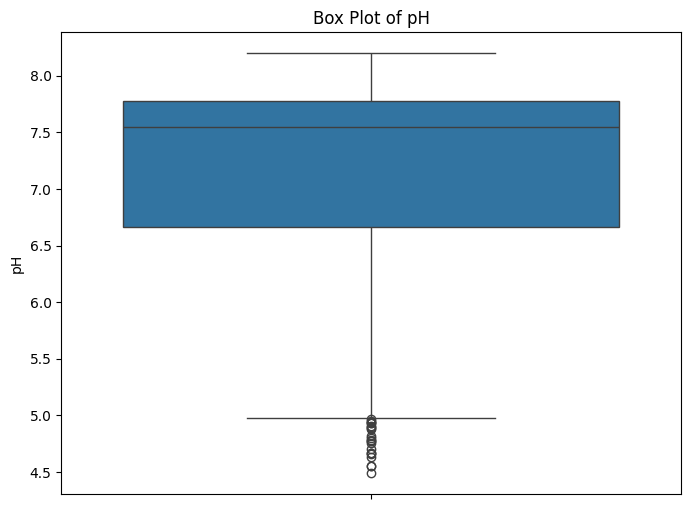

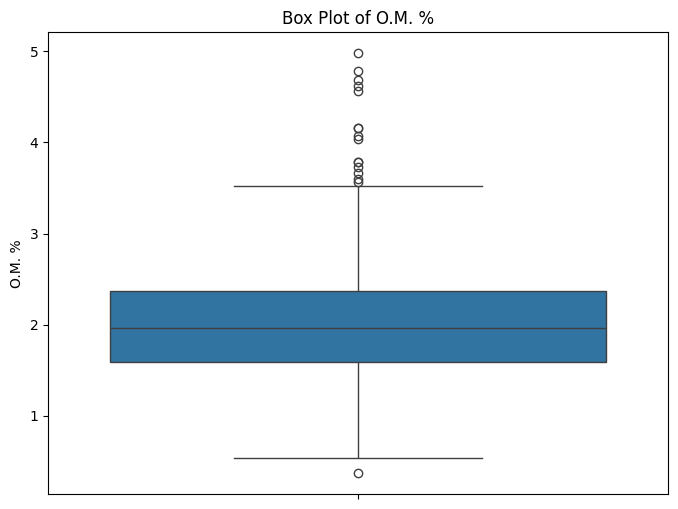

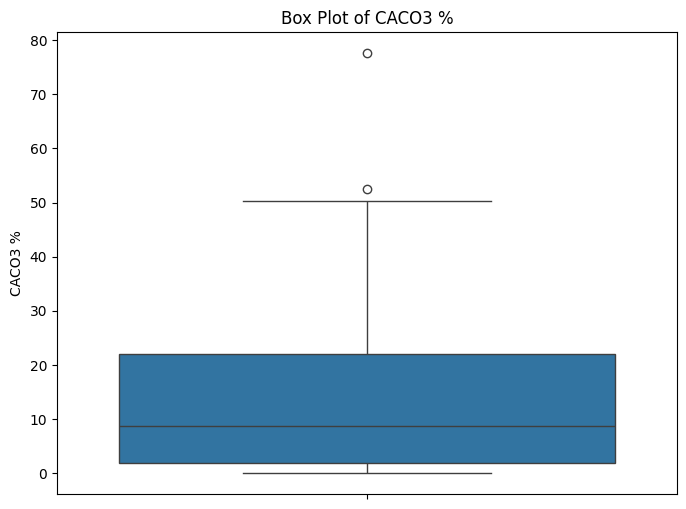

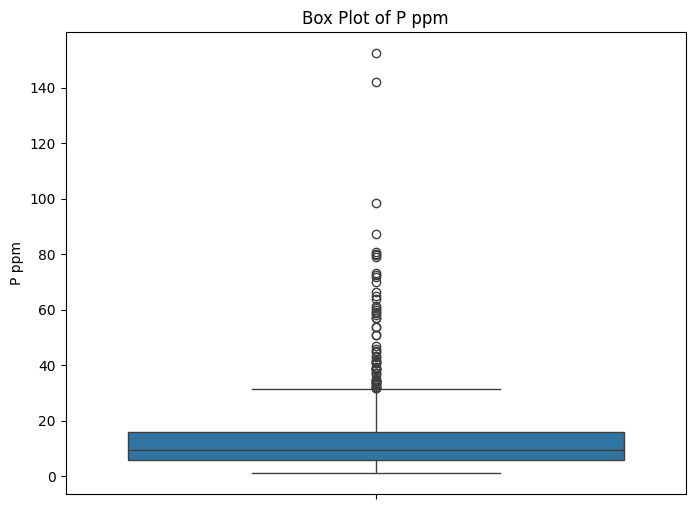

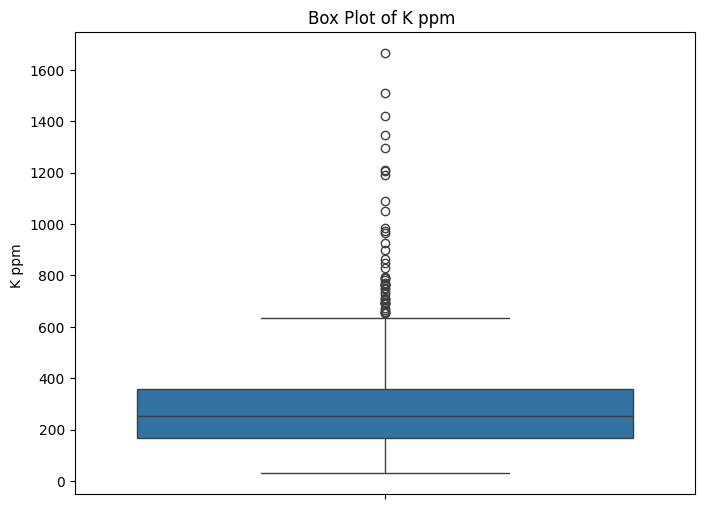

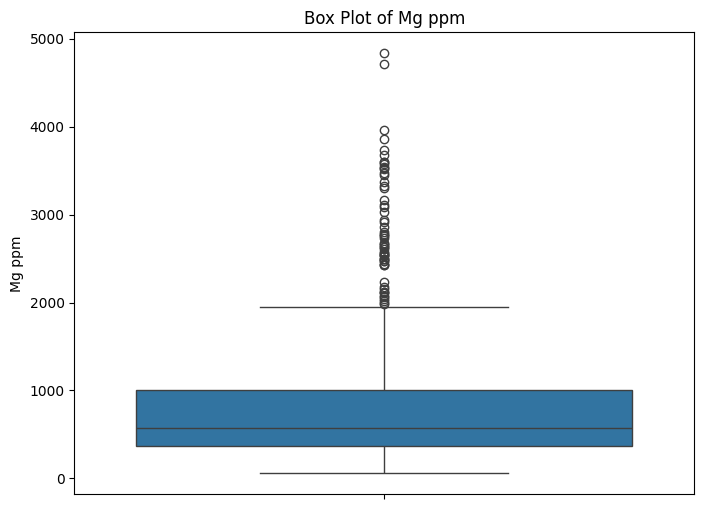

In [ ]:
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_soil_data_grevena_clean[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
count_data_outliers = []
columns_outliers = []
for col in columns:
    Q1 = df_soil_data_grevena_clean[col].quantile(0.25)
    Q3 = df_soil_data_grevena_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_soil_data_grevena_clean[(df_soil_data_grevena_clean[col] < lower_bound) | (df_soil_data_grevena_clean[col] > upper_bound)]

    if not outliers.empty:
        count_data_outliers.append(int(outliers.loc[:, col].count()))
        columns_outliers.append(col)

    df_soil_data_grevena_clean.loc[(df_soil_data_grevena_clean[col] < lower_bound), col] = lower_bound
    df_soil_data_grevena_clean.loc[(df_soil_data_grevena_clean[col] > upper_bound), col] = upper_bound

df_data_soil_outliers = pd.DataFrame(columns=columns_outliers)
df_data_soil_outliers.loc[1] = count_data_outliers

count = []
for col in columns:
  count.append(int(outliers.loc[:, col].count()))

df_data_soil_outliers


<ipython-input-158-bf8441e64e48>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-114.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_soil_data_grevena_clean.loc[(df_soil_data_grevena_clean[col] < lower_bound), col] = lower_bound


,Sand %,Silt %,pH,O.M. %,CACO3 %,P ppm,K ppm,Mg ppm
1,12,17,23,16,2,60,45,61


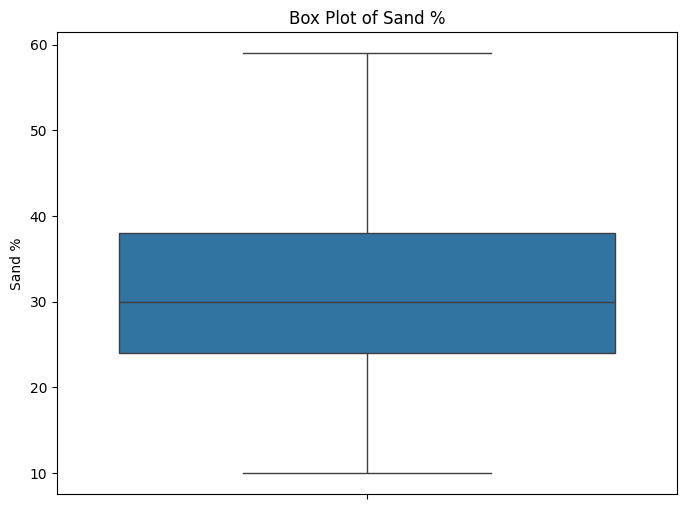

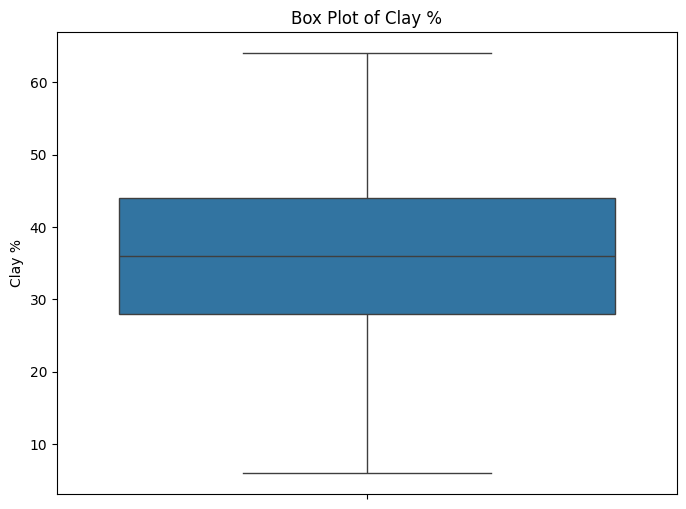

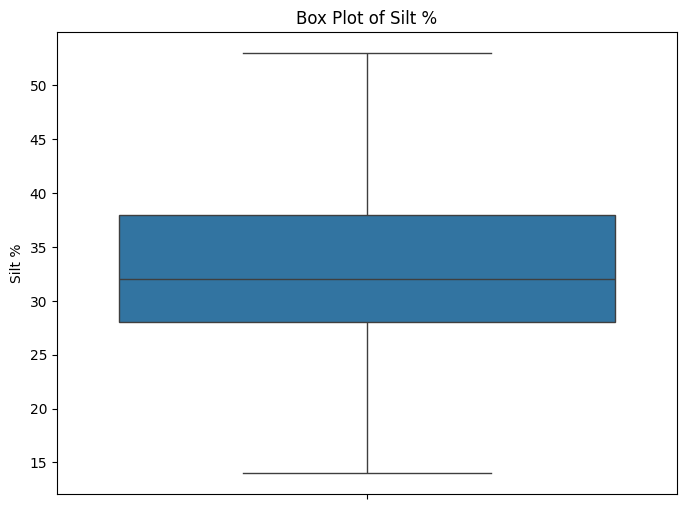

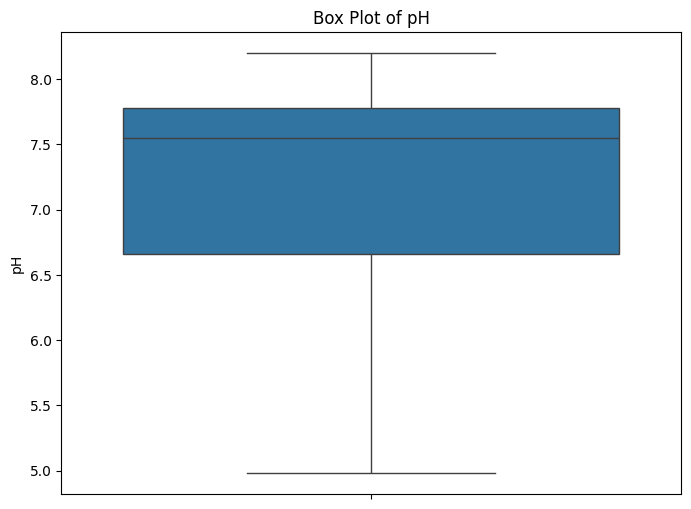

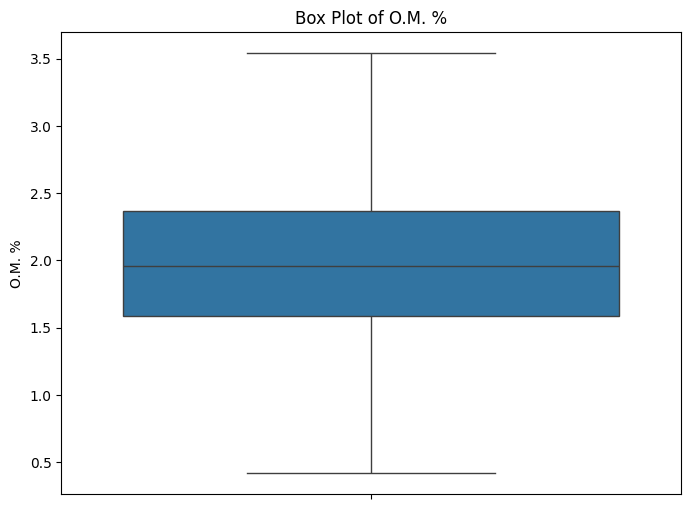

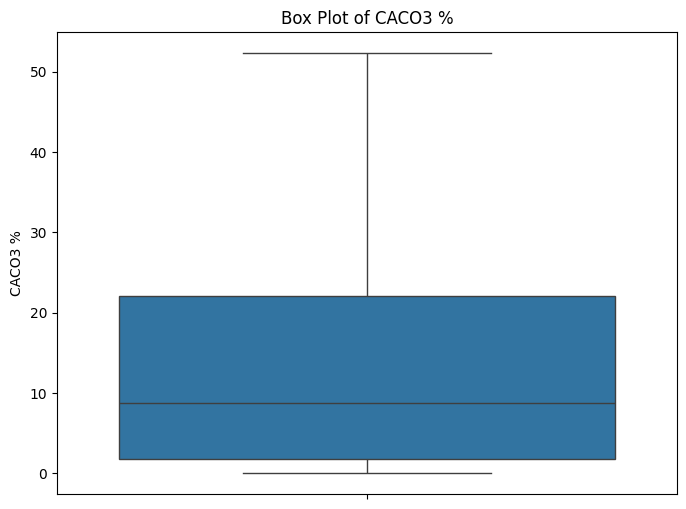

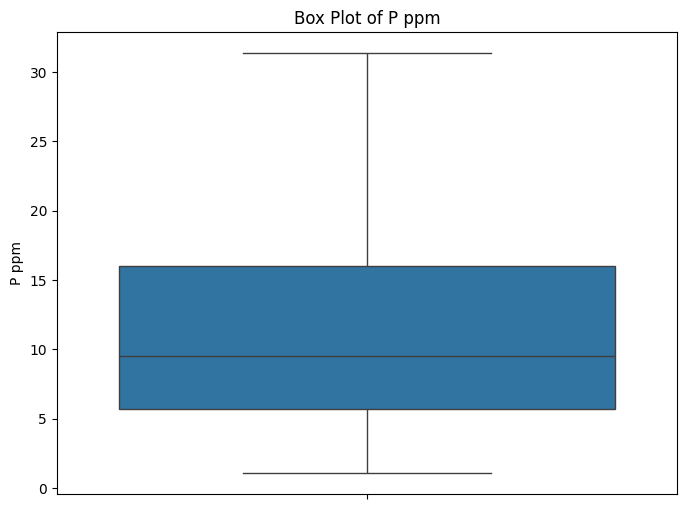

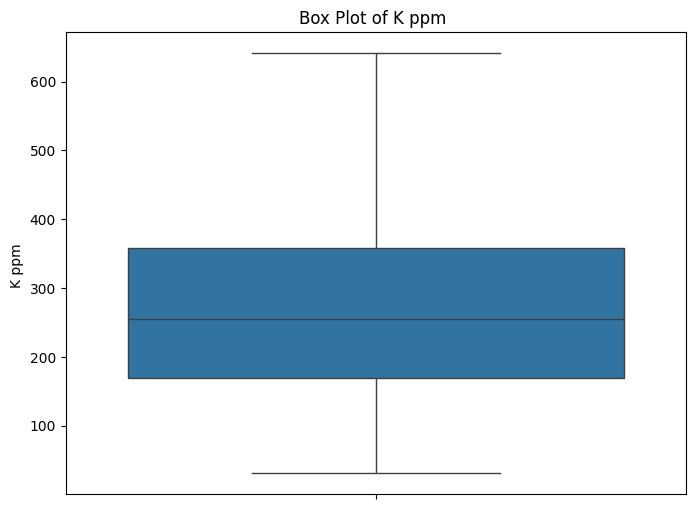

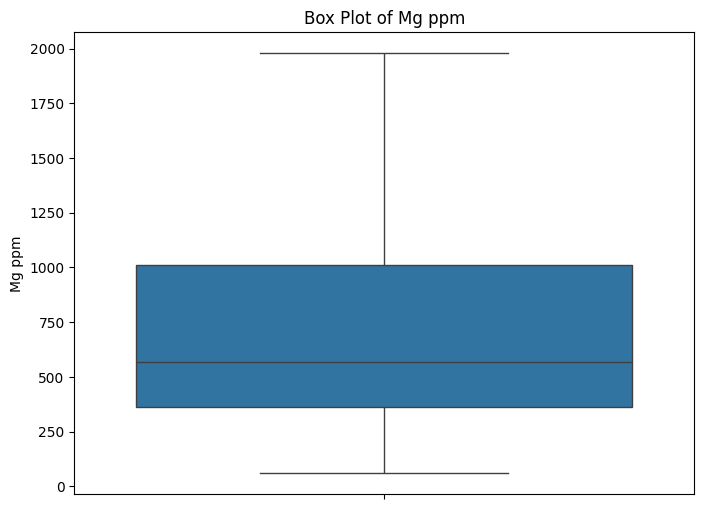

In [ ]:
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_soil_data_grevena_clean[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

### **Conclusión del conjunto de datos Soil Data Grevana:**
- Solo un datos es null, así que no hay problema con ello
- Tipados correctamente
- No hay filas duplicadas

### **Extracción y limpieza del segundo dataset Soil Data Hugging**
- https://huggingface.co/datasets/Prazzwal07/soil_data

In [ ]:
df_soil_data_hugging = pd.read_parquet("gs://uao-etl-storage/soil_data_hugging.parquet")

In [ ]:
df_soil_data_hugging_clean = df_soil_data_hugging.copy()

In [ ]:
df_soil_data_hugging_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       1359 non-null   object 
 1   Longitude      1359 non-null   float64
 2   Latitude       1359 non-null   float64
 3   parentsoil     1354 non-null   object 
 4   ph             1359 non-null   float64
 5   clay           1359 non-null   object 
 6   organicMatter  1359 non-null   object 
 7   totalNitrogen  1359 non-null   object 
 8   boron          1359 non-null   object 
 9   p2o5           1359 non-null   object 
 10  sand           1359 non-null   object 
dtypes: float64(3), object(8)
memory usage: 116.9+ KB


In [ ]:
df_soil_data_hugging_clean.head()

,Location,Longitude,Latitude,parentsoil,ph,clay,organicMatter,totalNitrogen,boron,p2o5,sand
0,Babala,81.23,29.32,"slate, phyllite",6.48,10.28 %,3.13 %,0.14 %,0.72 ppm,54.91 kg/ha,52.04 %
1,Devistan,81.20,29.30,"slate, phyllite",6.48,13.25 %,3.47 %,0.13 %,0.78 ppm,90.48 kg/ha,52.6 %
2,Devikot,81.17,29.27,Quartzite,6.27,14.01 %,3.35 %,0.13 %,0.9 ppm,70.26 kg/ha,51.25 %
3,Patalkot,81.13,29.25,Quartzite,6.16,14.12 %,3.12 %,0.17 %,0.87 ppm,68.85 kg/ha,57.22 %
4,Duni,81.10,29.25,"slate, phyllite",5.93,18.62 %,3.49 %,0.2 %,0.93 ppm,103.14 kg/ha,50.65 %


In [ ]:
df_soil_data_hugging_clean.drop(columns=["Location", "Longitude", "Latitude", "parentsoil", "totalNitrogen", "p2o5"], inplace=True)

In [ ]:
df_soil_data_hugging_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ph             1359 non-null   float64
 1   clay           1359 non-null   object 
 2   organicMatter  1359 non-null   object 
 3   boron          1359 non-null   object 
 4   sand           1359 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.2+ KB


In [ ]:
df_soil_data_hugging_clean["clay"] = df_soil_data_hugging_clean.loc[:, "clay"].str.replace("%", "").astype(float)
df_soil_data_hugging_clean["organicMatter"] = df_soil_data_hugging_clean.loc[:, "organicMatter"].str.replace("%", "").astype(float)
df_soil_data_hugging_clean["sand"] = df_soil_data_hugging_clean.loc[:, "sand"].str.replace("%", "").astype(float)
df_soil_data_hugging_clean["boron"] = df_soil_data_hugging_clean.loc[:, "boron"].str.replace("ppm", "").astype(float)

In [ ]:
df_soil_data_hugging_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ph             1359 non-null   float64
 1   clay           1359 non-null   float64
 2   organicMatter  1359 non-null   float64
 3   boron          1359 non-null   float64
 4   sand           1359 non-null   float64
dtypes: float64(5)
memory usage: 53.2 KB


In [ ]:
df_soil_data_hugging_clean.duplicated().sum()

np.int64(6)

In [ ]:
df_soil_data_hugging_clean.drop_duplicates(inplace=True)
df_soil_data_hugging_clean.duplicated().sum()

np.int64(0)

In [ ]:
df_soil_data_hugging_clean.isnull().sum()

,0
ph,0
clay,0
organicMatter,0
boron,0
sand,0


In [ ]:
df_soil_data_hugging_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1353 entries, 0 to 1358
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ph             1353 non-null   float64
 1   clay           1353 non-null   float64
 2   organicMatter  1353 non-null   float64
 3   boron          1353 non-null   float64
 4   sand           1353 non-null   float64
dtypes: float64(5)
memory usage: 63.4 KB


In [ ]:
df_soil_data_hugging_clean.describe()

,ph,clay,organicMatter,boron,sand
count,1353.000000,1353.000000,1353.000000,1353.00000,1353.000000
mean,6.340503,15.104176,3.087177,1.00048,49.158670
std,0.466235,6.347173,1.165005,0.79794,10.853903
min,5.340000,0.710000,0.800000,0.10000,16.870000
25%,5.990000,11.100000,2.330000,0.68000,42.830000
50%,6.290000,14.100000,2.940000,0.90000,49.360000
75%,6.610000,17.730000,3.680000,1.06000,56.340000
max,8.040000,51.000000,7.970000,11.55000,86.820000


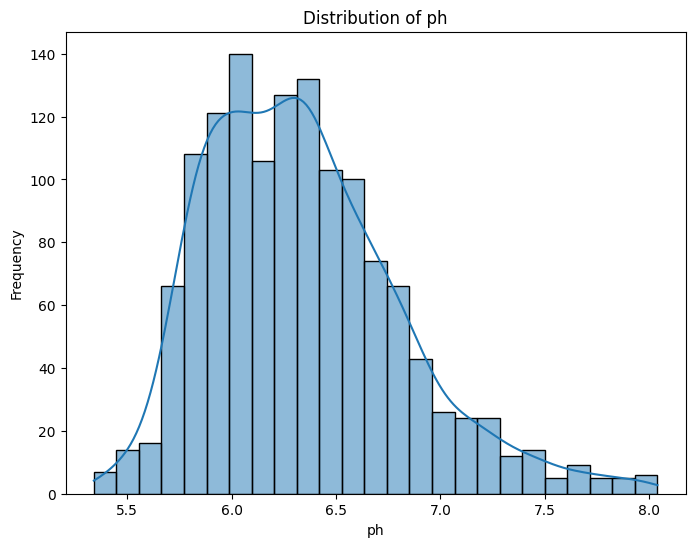

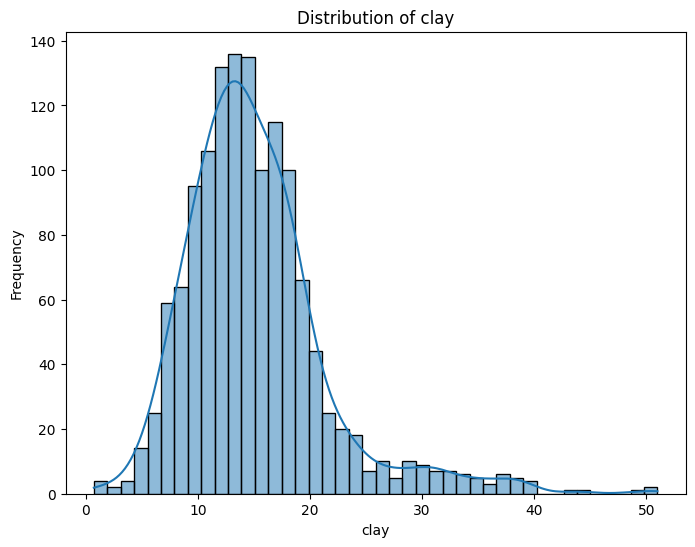

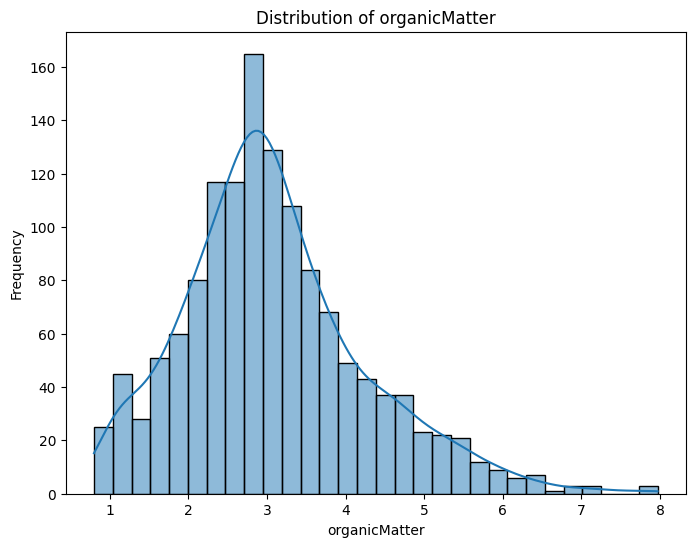

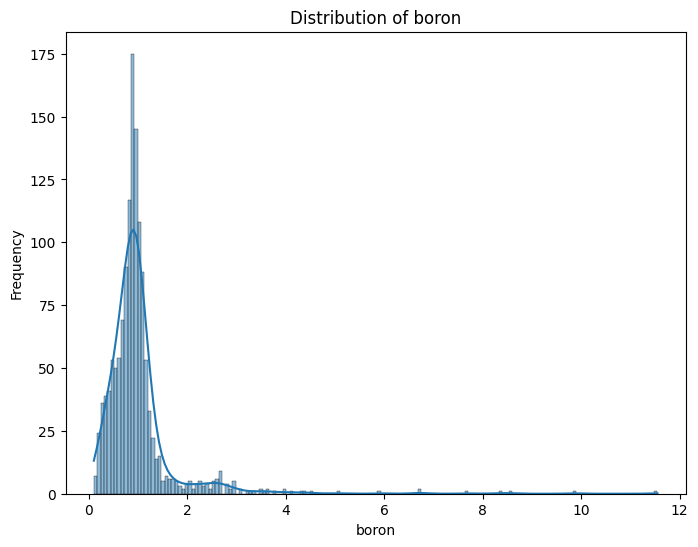

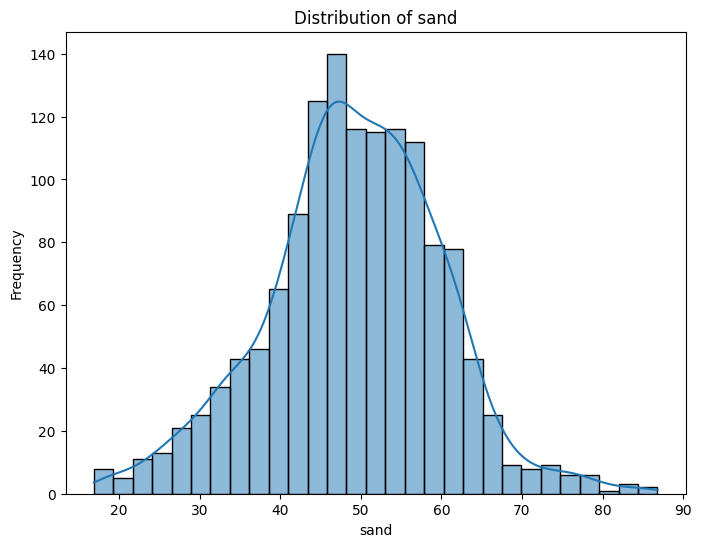

In [ ]:
columns = df_soil_data_hugging_clean.columns
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_soil_data_hugging_clean[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


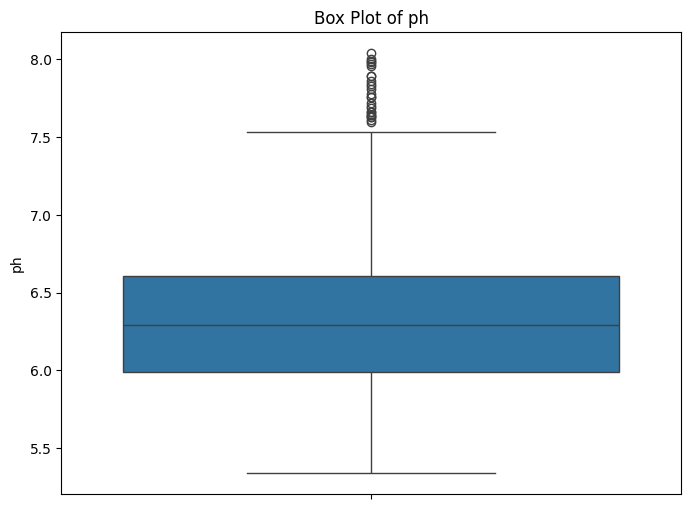

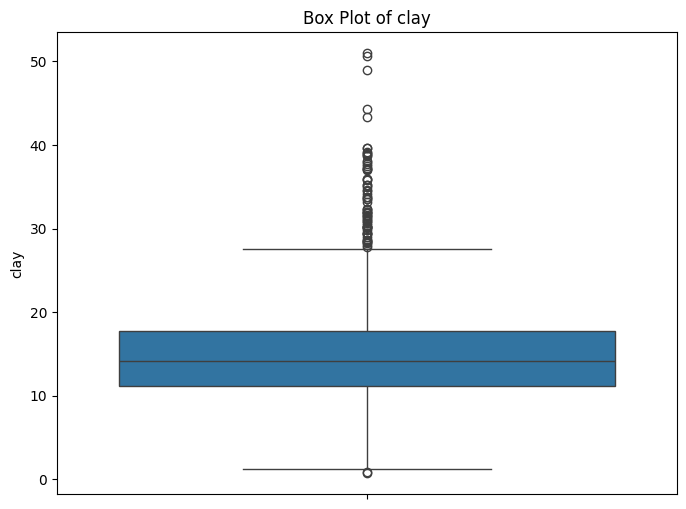

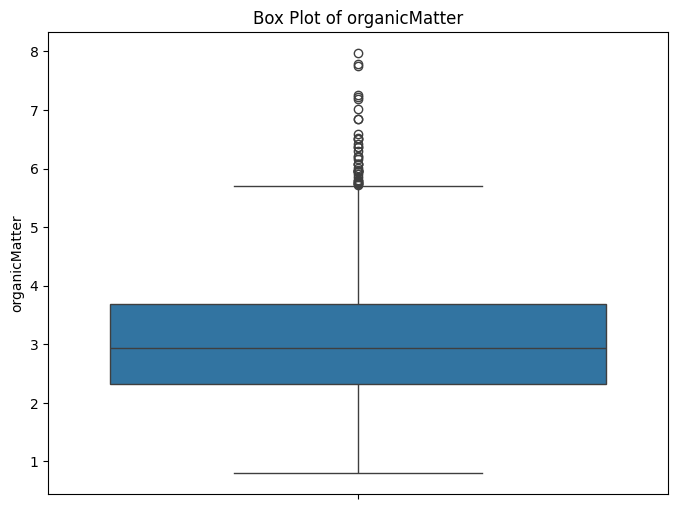

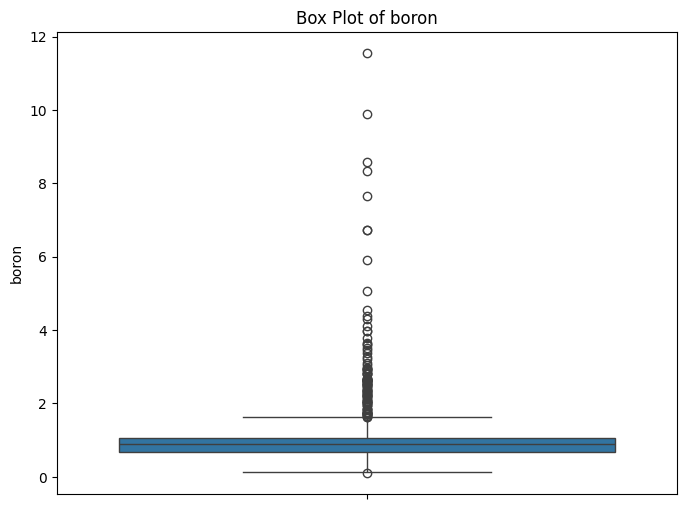

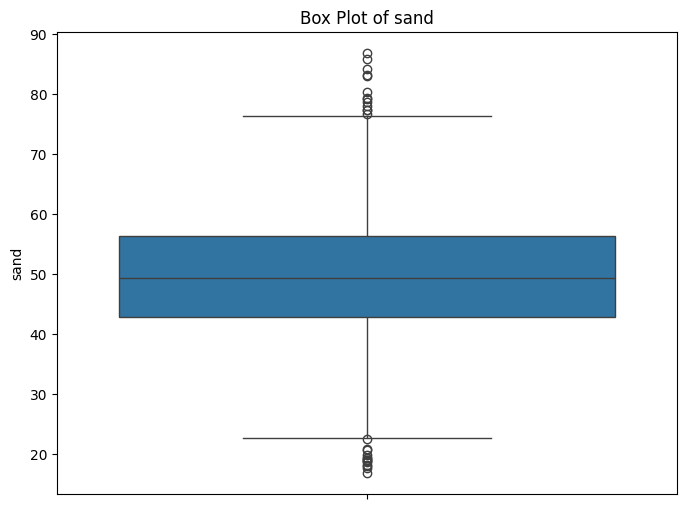

In [ ]:
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df_soil_data_hugging_clean[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

In [ ]:
count_data_outliers = []
columns_outliers = []
for col in columns:
    Q1 = df_soil_data_hugging_clean[col].quantile(0.25)
    Q3 = df_soil_data_hugging_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_soil_data_hugging_clean[(df_soil_data_hugging_clean[col] < lower_bound) | (df_soil_data_hugging_clean[col] > upper_bound)]

    if not outliers.empty:
        count_data_outliers.append(int(outliers.loc[:, col].count()))
        columns_outliers.append(col)

    df_soil_data_hugging_clean.loc[(df_soil_data_hugging_clean[col] < lower_bound), col] = lower_bound
    df_soil_data_hugging_clean.loc[(df_soil_data_hugging_clean[col] > upper_bound), col] = upper_bound

df_data_soil_hugging_outliers = pd.DataFrame(columns=columns_outliers)
df_data_soil_hugging_outliers.loc[1] = count_data_outliers

count = []
for col in columns:
  count.append(int(outliers.loc[:, col].count()))

df_data_soil_hugging_outliers

,ph,clay,organicMatter,boron,sand
1,26,71,40,107,27


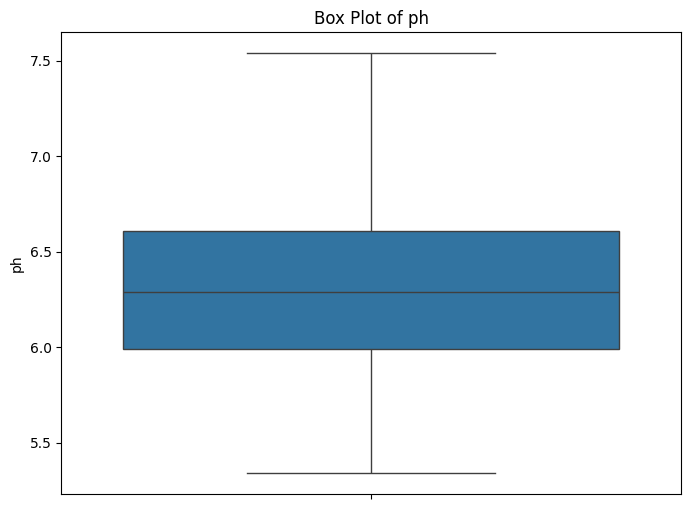

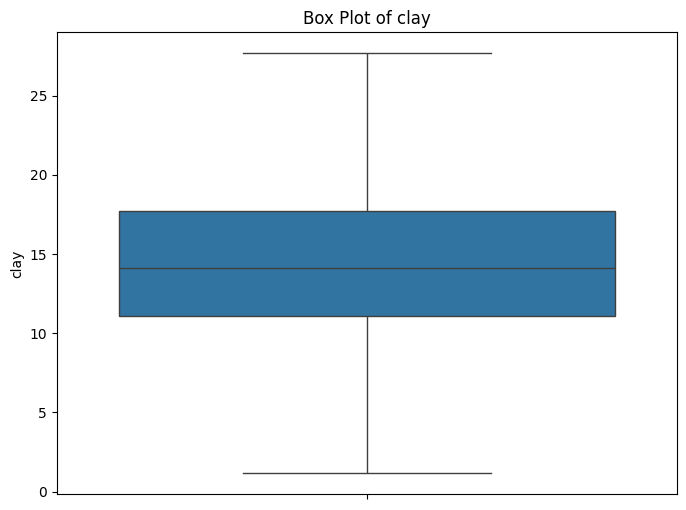

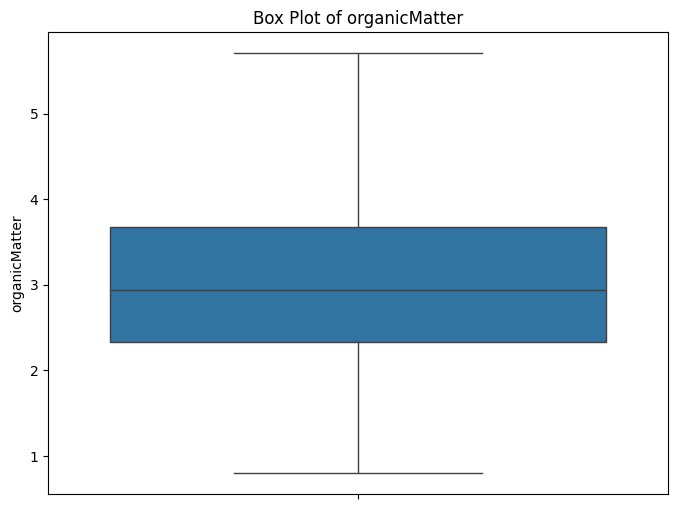

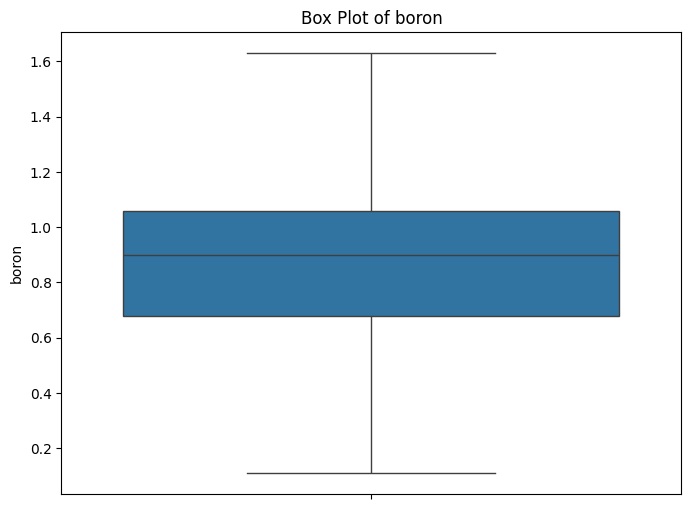

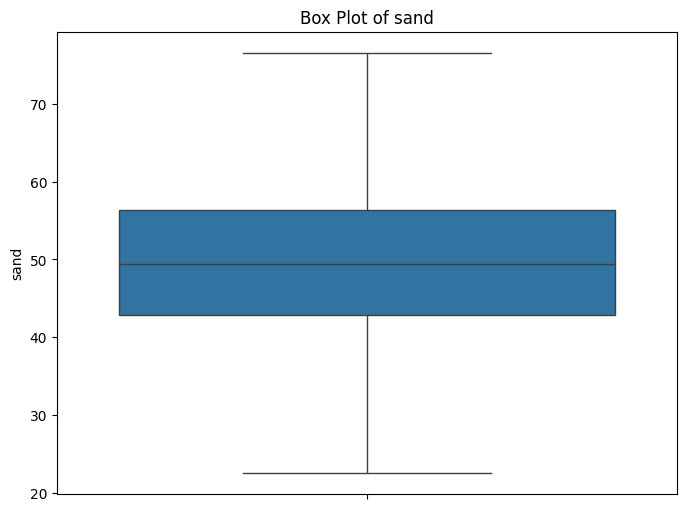

In [ ]:
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df_soil_data_hugging_clean[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

### **Conclusión del conjunto de datos soil HuggingFace:**
- No hay datos nulos
- Se elimina los porcentajes y se deja los campos como float
- Hay filas duplicadas, pocas así que se elimina

### **Extracción y limpieza del tercer dataset Soil Data Colombia**

In [ ]:
df_datos_colombia = pd.read_excel("gs://uao-etl-storage/samples_soil_colombia.xlsx")

In [ ]:
df_datos_colombia.head()

,id,IDENTIFICACION_LABORATORIO,LOTE,PROFUNDIDAD_MUESTREO,Ph (adimensional),CONDUCTIVIDAD ELECTRICA (ds/m),MATERIA ORGANICA (%),FÓSFORO POR BRAY II (ppm),FÓSFORO POR OLSEN (ppm),CALCIO (meq/100g),...,SUMA DE BASES (meq/100g),SATURACIÓN DE BASES (%),ACIDEZ INTERCAMBIABLE (meq/100g),SATURACIÓN DE POTASIO (%),SATURACIÓN DE CALCIO (%),SATURACIÓN DE MAGNESIO (%),SATURACIÓN DE SODIO (%),SATURACIÓN DE ALUMINIO (%),RELACIÓN HIERRO/MAGNESIO (adimensional),RELACIÓN POTASIO/SODIO (adimensional)
0,1,Lab-24001,1,0-30,4.61,0.075,10.810,9.37,NaN,0.342,...,0.610,31.299,1.553,5.336,17.548,5.901,2.514,68.701,13.455105,2.122449
1,2,Lab-24002,1,0-30,4.03,0.102,2.092,6.71,NaN,0.216,...,0.363,26.698,1.228,5.663,15.887,3.898,1.250,73.302,149.038934,4.529412
2,3,Lab-24003,1,0-30,4.27,0.155,2.040,54.73,NaN,0.452,...,0.668,26.258,2.162,3.184,17.767,4.756,0.550,73.742,17.682263,5.785714
3,4,Lab-24004,1,0-30,4.24,0.127,3.041,9.48,NaN,0.224,...,0.404,21.478,1.758,3.828,11.909,4.997,0.744,78.522,53.743976,5.142857
4,5,Lab-24005,1,0-30,4.05,0.205,3.708,4.67,NaN,0.388,...,0.592,25.553,1.976,4.230,16.748,3.885,0.691,74.447,113.275405,6.125000


In [ ]:
df_datos_colombia_clean = df_datos_colombia.copy()

In [ ]:
df_datos_colombia_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      389 non-null    int64  
 1   IDENTIFICACION_LABORATORIO                              389 non-null    object 
 2   LOTE                                                    389 non-null    int64  
 3   PROFUNDIDAD_MUESTREO                                    389 non-null    object 
 4   Ph (adimensional)                                       389 non-null    float64
 5   CONDUCTIVIDAD ELECTRICA (ds/m)                          389 non-null    float64
 6   MATERIA ORGANICA (%)                                    389 non-null    float64
 7   FÓSFORO POR BRAY II (ppm)                               389 non-null    float64
 8   FÓSFORO POR OLSEN (ppm)                 

In [ ]:
df_datos_colombia_clean.columns

Index(['id', 'IDENTIFICACION_LABORATORIO', 'LOTE', 'PROFUNDIDAD_MUESTREO',
       'Ph (adimensional)', 'CONDUCTIVIDAD ELECTRICA (ds/m)',
       'MATERIA ORGANICA (%)', 'FÓSFORO POR BRAY II (ppm)',
       'FÓSFORO POR OLSEN (ppm)', 'CALCIO (meq/100g)', 'MAGNESIO (meq/100g)',
       'POTASIO (meq/100g)', 'SODIO (meq/100g)', 'ALUMINIO (meq/100g)',
       'CAPACIDAD DE INTERCAMBIO CATIÓNICO (meq/100g)',
       'RELACIÓN CaLCIO/MAGNESIO (Adimensional)',
       'RELACION CaLCIO/MAGNESIO/POTASIO (Adimensional)', 'BORO (ppm)',
       'COBRE (ppm)', 'HIERRO  (ppm)', 'MANGANESO  (ppm)', 'ZINC  (ppm)',
       'AZUFRE  (ppm)', 'ARCILLAS (%)', 'LIMOS (%)', 'ARENAS (%)',
       'CLASE TEXTURAL', 'CARBONO ORGÁNICO (%)',
       'CAPACIDAD DE INTERCAMBIO CATIÓNICO EFECTIVA (meq/100g)',
       'SUMA DE BASES  (meq/100g)', 'SATURACIÓN DE BASES (%)',
       'ACIDEZ INTERCAMBIABLE (meq/100g)', 'SATURACIÓN DE POTASIO (%)',
       'SATURACIÓN DE CALCIO (%)', 'SATURACIÓN DE MAGNESIO (%)',
       'SATURACIÓN D

In [ ]:
df_datos_colombia_clean.drop(columns=['id', 'IDENTIFICACION_LABORATORIO', 'LOTE', 'PROFUNDIDAD_MUESTREO',
       'CONDUCTIVIDAD ELECTRICA (ds/m)',
       'FÓSFORO POR OLSEN (ppm)',
       'SODIO (meq/100g)',
       'ALUMINIO (meq/100g)',
       'CAPACIDAD DE INTERCAMBIO CATIÓNICO (meq/100g)',
       'RELACIÓN CaLCIO/MAGNESIO (Adimensional)',
       'RELACION CaLCIO/MAGNESIO/POTASIO (Adimensional)',
       'COBRE (ppm)', 'HIERRO  (ppm)', 'MANGANESO  (ppm)', 'ZINC  (ppm)',
       'AZUFRE  (ppm)',
       'CARBONO ORGÁNICO (%)',
       'CLASE TEXTURAL',
       'CAPACIDAD DE INTERCAMBIO CATIÓNICO EFECTIVA (meq/100g)',
       'SUMA DE BASES  (meq/100g)', 'SATURACIÓN DE BASES (%)',
       'ACIDEZ INTERCAMBIABLE (meq/100g)', 'SATURACIÓN DE POTASIO (%)',
       'SATURACIÓN DE CALCIO (%)', 'SATURACIÓN DE MAGNESIO (%)',
       'SATURACIÓN DE SODIO (%)', 'SATURACIÓN DE ALUMINIO (%)',
       'RELACIÓN HIERRO/MAGNESIO (adimensional)',
       'RELACIÓN POTASIO/SODIO (adimensional)'], inplace=True)

In [ ]:
df_datos_colombia_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ph (adimensional)          389 non-null    float64
 1   MATERIA ORGANICA (%)       389 non-null    float64
 2   FÓSFORO POR BRAY II (ppm)  389 non-null    float64
 3   CALCIO (meq/100g)          389 non-null    float64
 4   MAGNESIO (meq/100g)        389 non-null    float64
 5   POTASIO (meq/100g)         389 non-null    float64
 6   BORO (ppm)                 389 non-null    float64
 7   ARCILLAS (%)               389 non-null    float64
 8   LIMOS (%)                  389 non-null    float64
 9   ARENAS (%)                 389 non-null    float64
dtypes: float64(10)
memory usage: 30.5 KB


In [ ]:
df_datos_colombia_clean.describe()

,Ph (adimensional),MATERIA ORGANICA (%),FÓSFORO POR BRAY II (ppm),CALCIO (meq/100g),MAGNESIO (meq/100g),POTASIO (meq/100g),BORO (ppm),ARCILLAS (%),LIMOS (%),ARENAS (%)
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,4.612648,5.549676,30.900702,1.094429,0.379064,0.143411,0.317779,16.530643,35.800360,47.668997
std,0.281204,3.639566,39.507984,0.810801,0.439934,0.198764,0.134262,4.753078,8.643468,11.170864
min,3.770000,1.406000,0.740000,0.096000,0.042000,0.014000,0.040000,6.760000,12.620000,23.160000
25%,4.430000,2.990000,7.889000,0.575000,0.143000,0.048000,0.220000,13.100000,30.000000,39.240000
50%,4.610000,4.249000,17.060000,0.826000,0.258000,0.088000,0.299000,16.220000,36.000000,47.160000
75%,4.770000,7.181000,34.904000,1.398000,0.461000,0.157000,0.401000,19.220000,42.000000,54.900000
max,5.680000,32.463000,285.960000,5.153000,5.096000,1.732000,1.035000,35.760000,57.620000,78.240000


In [ ]:
df_datos_colombia_clean.isnull().sum()

,0
Ph (adimensional),0
MATERIA ORGANICA (%),0
FÓSFORO POR BRAY II (ppm),0
CALCIO (meq/100g),0
MAGNESIO (meq/100g),0
POTASIO (meq/100g),0
BORO (ppm),0
ARCILLAS (%),0
LIMOS (%),0
ARENAS (%),0


In [ ]:
df_datos_colombia_clean.duplicated().sum()

np.int64(0)

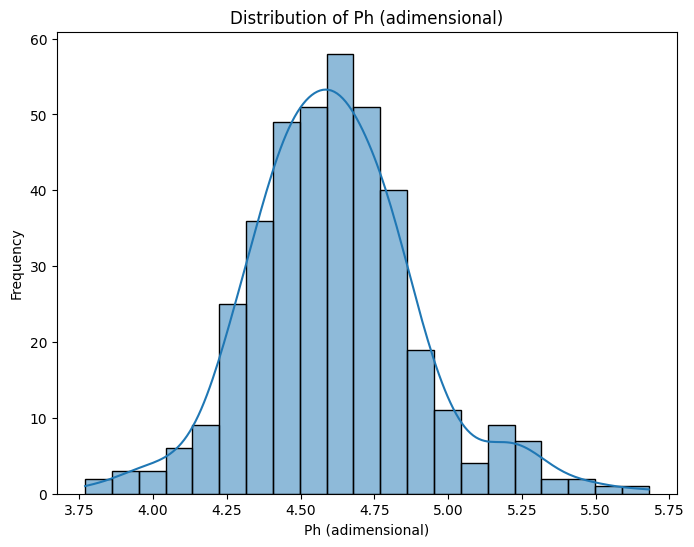

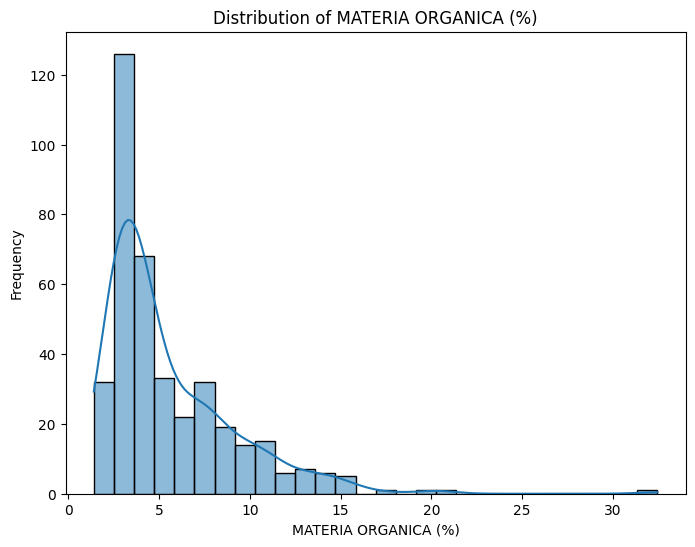

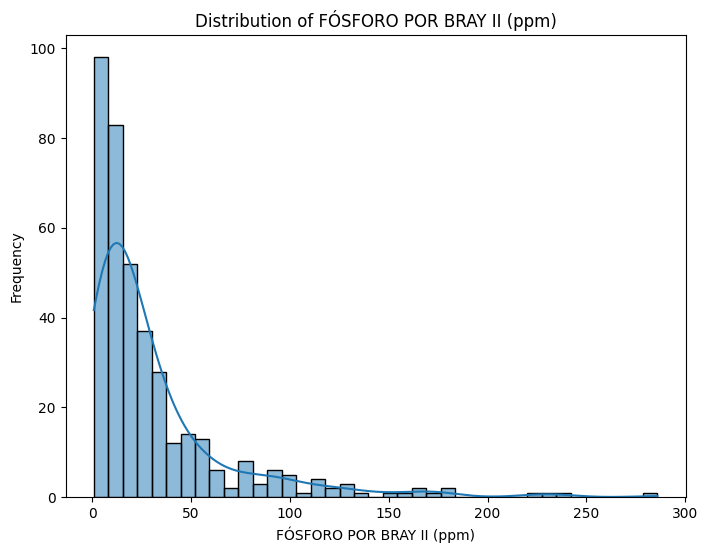

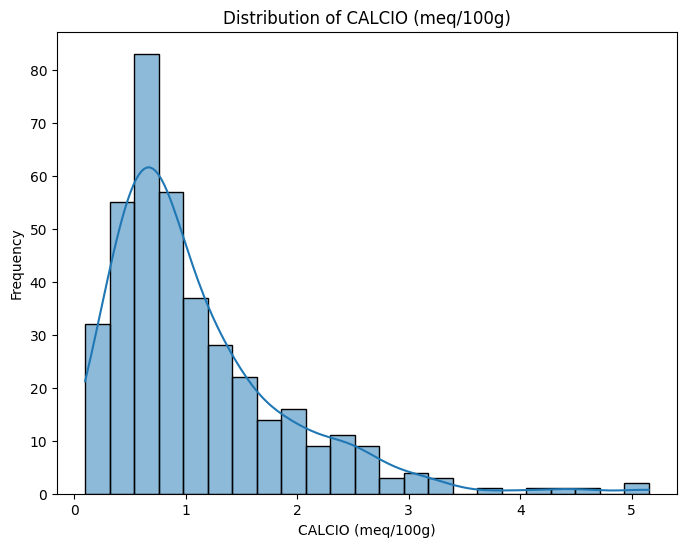

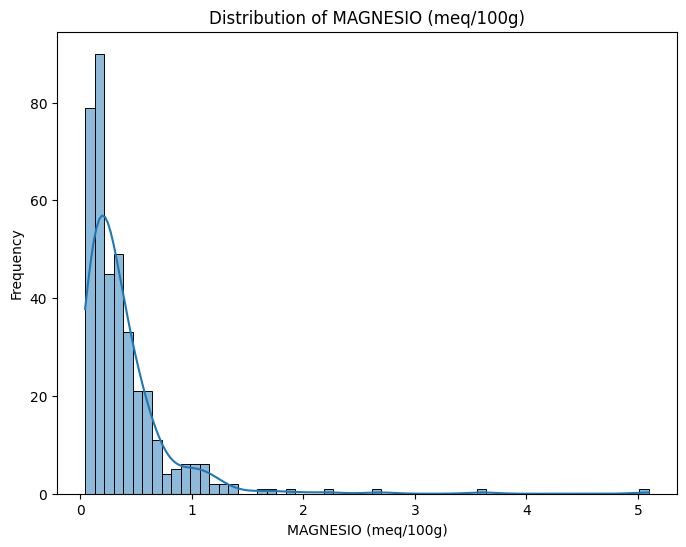

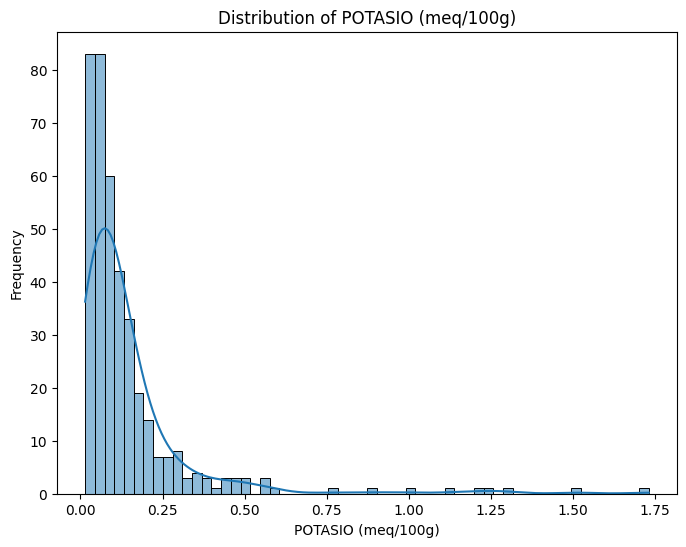

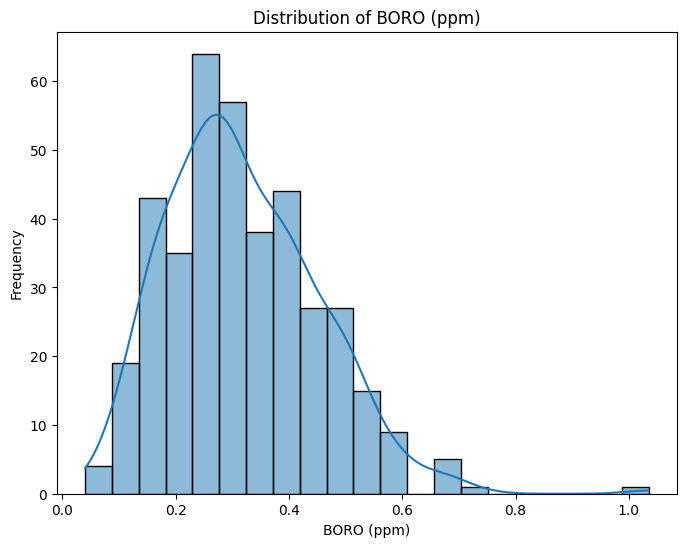

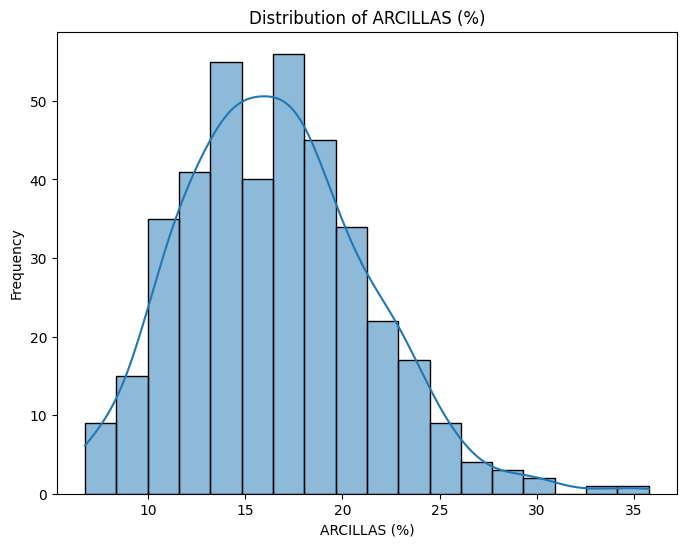

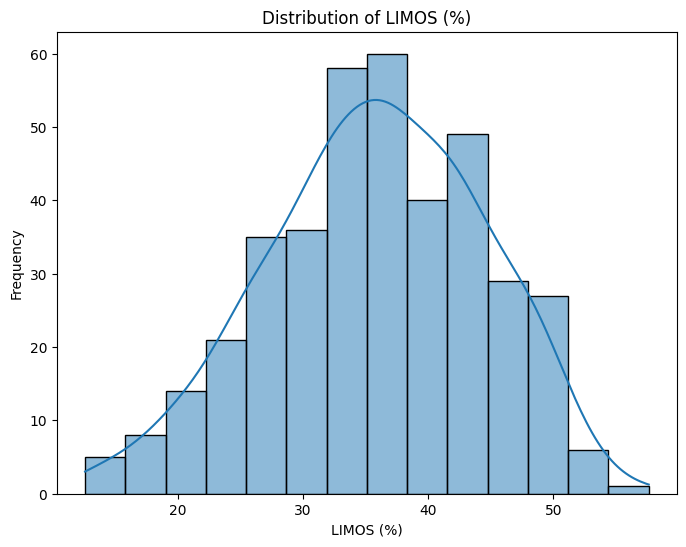

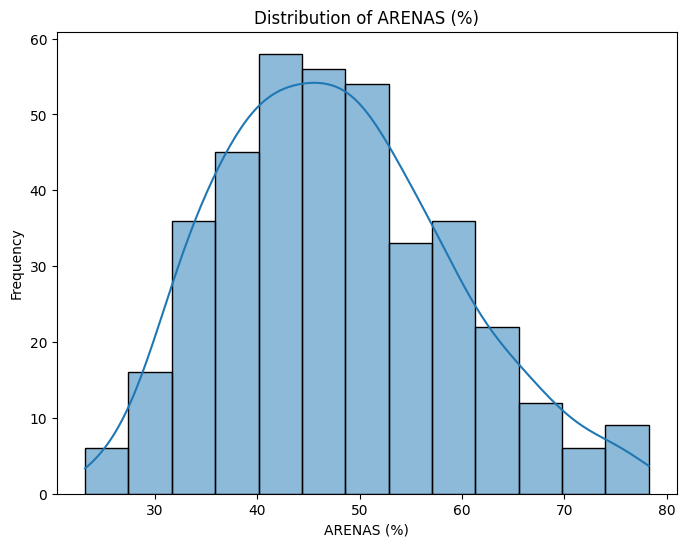

In [ ]:
columns = df_datos_colombia_clean.columns
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_datos_colombia_clean[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


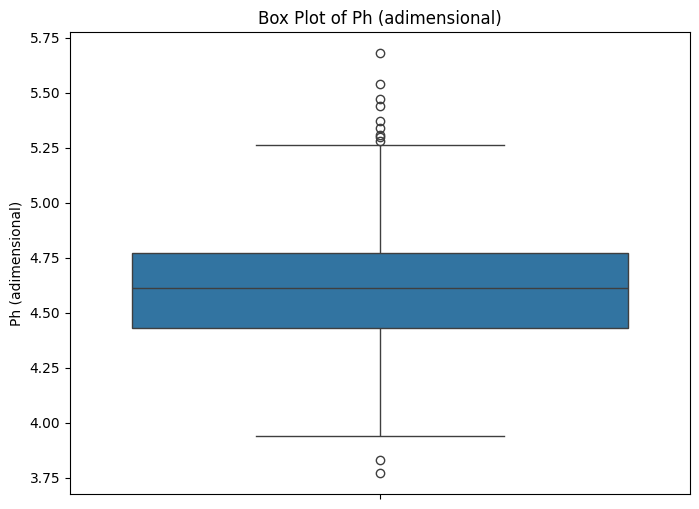

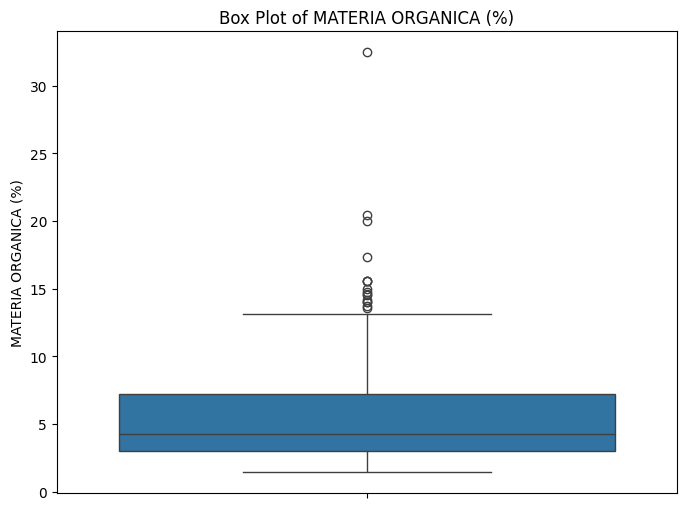

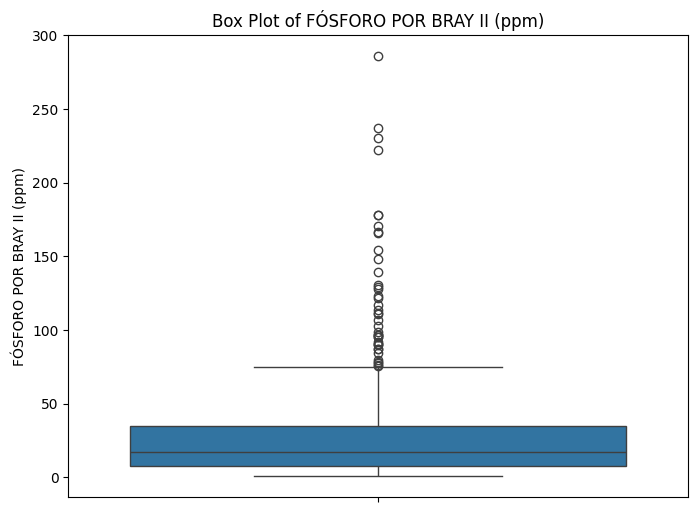

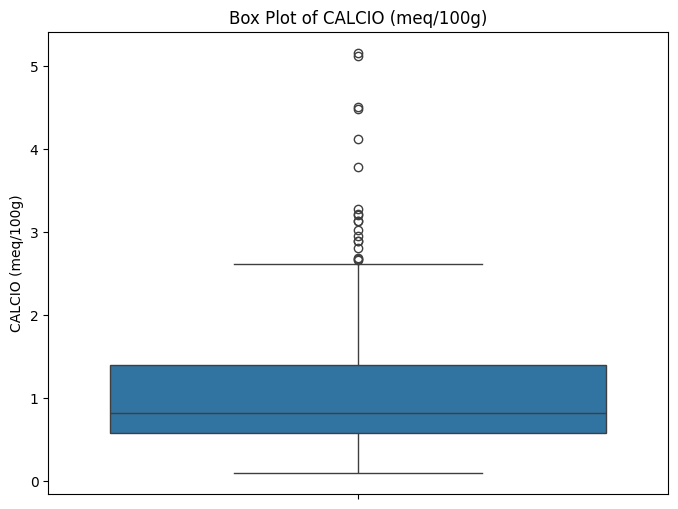

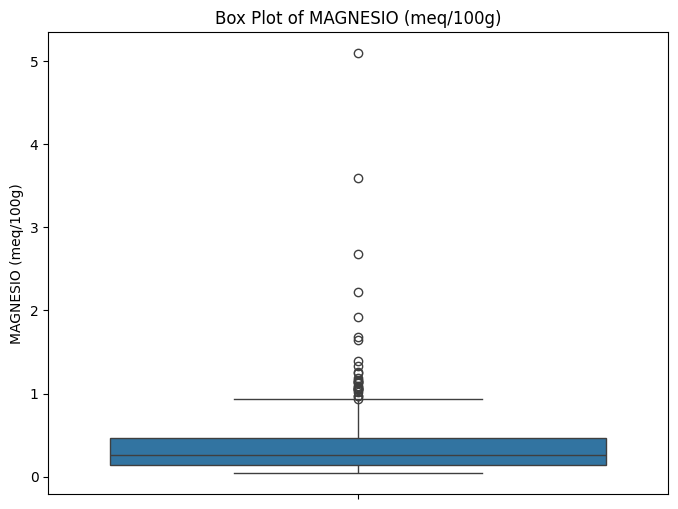

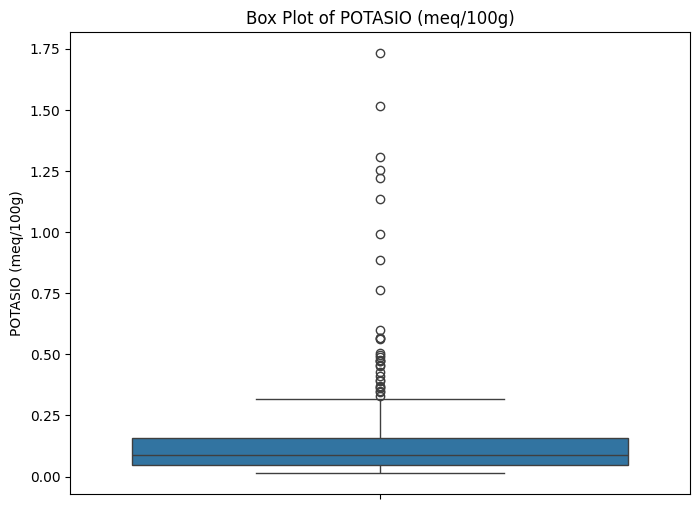

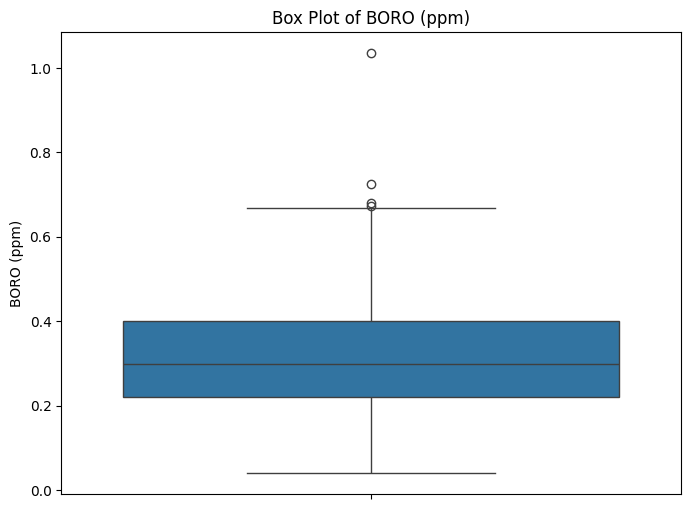

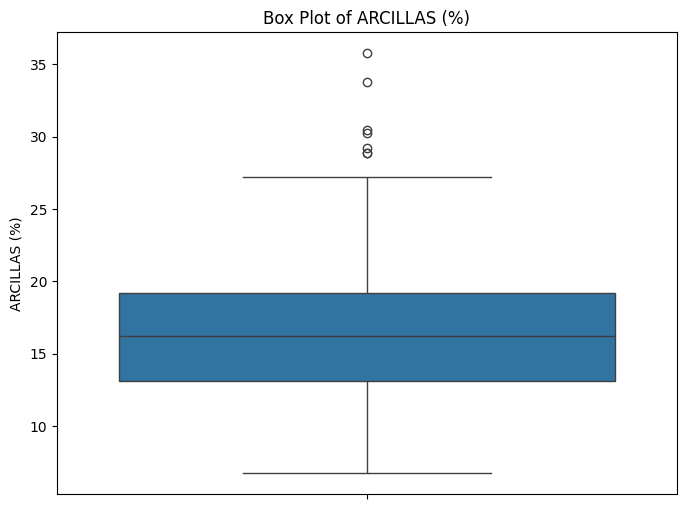

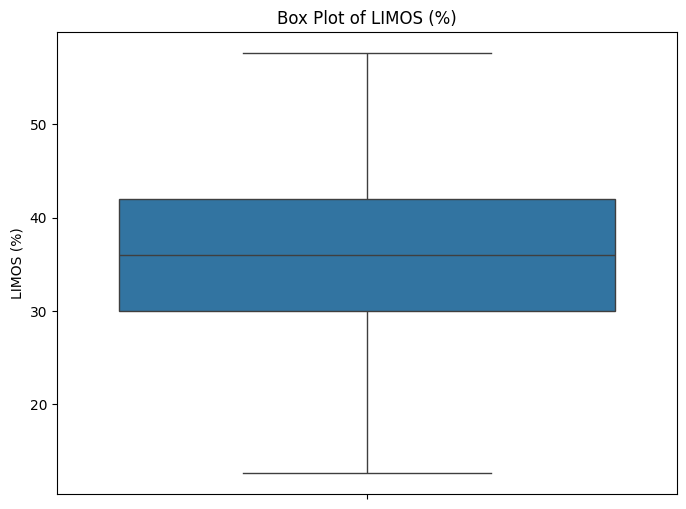

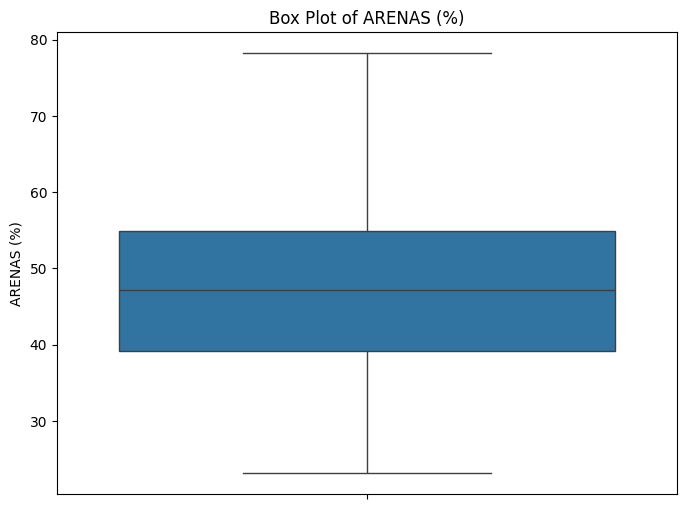

In [ ]:
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df_datos_colombia_clean[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

In [ ]:
columns = df_datos_colombia_clean.columns
count_data_outliers = []
columns_outliers = []
for col in columns:
    Q1 = df_datos_colombia_clean[col].quantile(0.25)
    Q3 = df_datos_colombia_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_datos_colombia_clean[(df_datos_colombia_clean[col] < lower_bound) | (df_datos_colombia_clean[col] > upper_bound)]

    if not outliers.empty:
        count_data_outliers.append(int(outliers.loc[:, col].count()))
        columns_outliers.append(col)

    df_datos_colombia_clean.loc[(df_datos_colombia_clean[col] < lower_bound), col] = lower_bound
    df_datos_colombia_clean.loc[(df_datos_colombia_clean[col] > upper_bound), col] = upper_bound

df_data_soil_colombia_outliers = pd.DataFrame(columns=columns_outliers)
df_data_soil_colombia_outliers.loc[1] = count_data_outliers

count = []
for col in columns:
  count.append(int(outliers.loc[:, col].count()))

df_data_soil_colombia_outliers

,Ph (adimensional),MATERIA ORGANICA (%),FÓSFORO POR BRAY II (ppm),CALCIO (meq/100g),MAGNESIO (meq/100g),POTASIO (meq/100g),BORO (ppm),ARCILLAS (%)
1,11,16,41,19,28,31,4,7


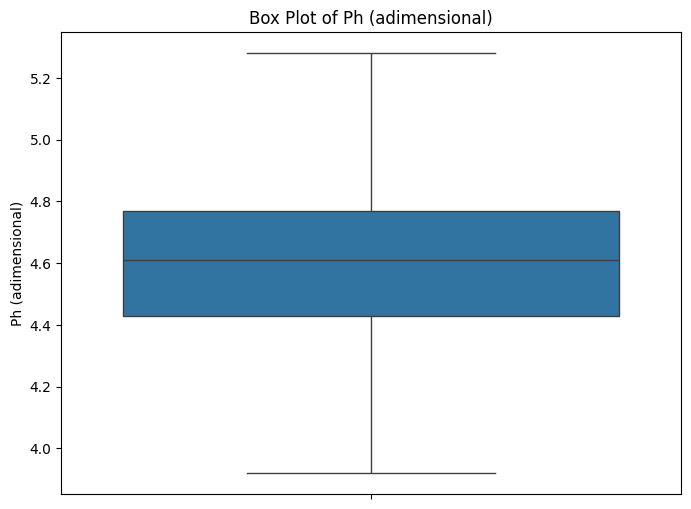

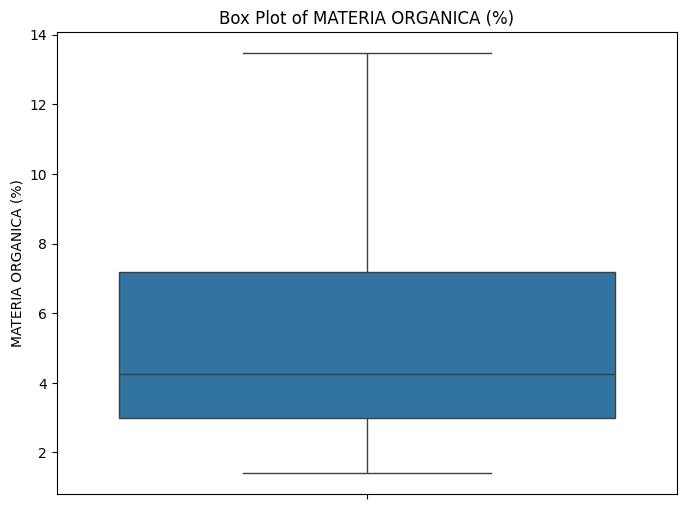

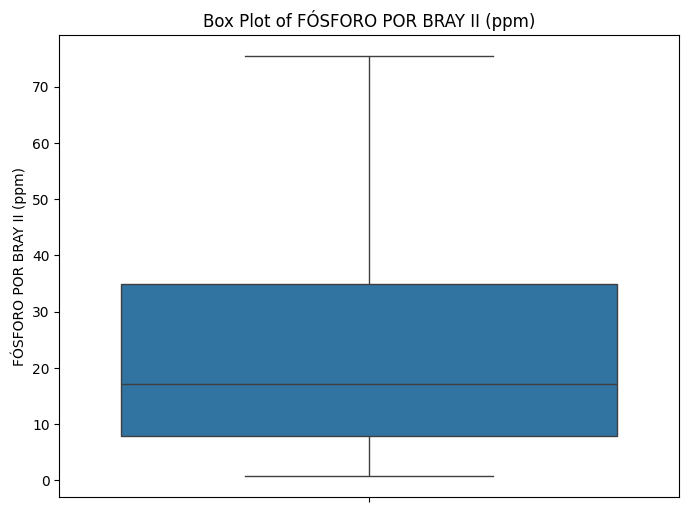

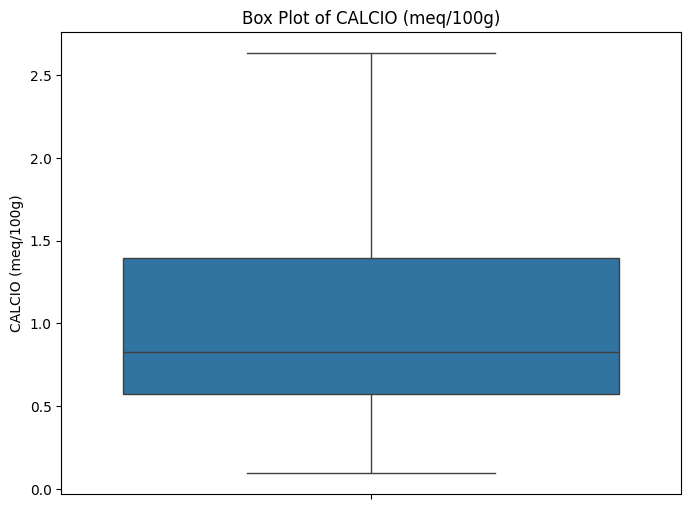

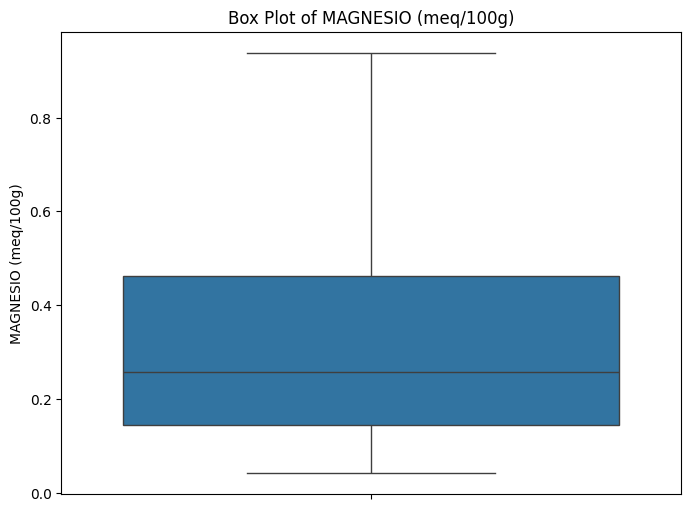

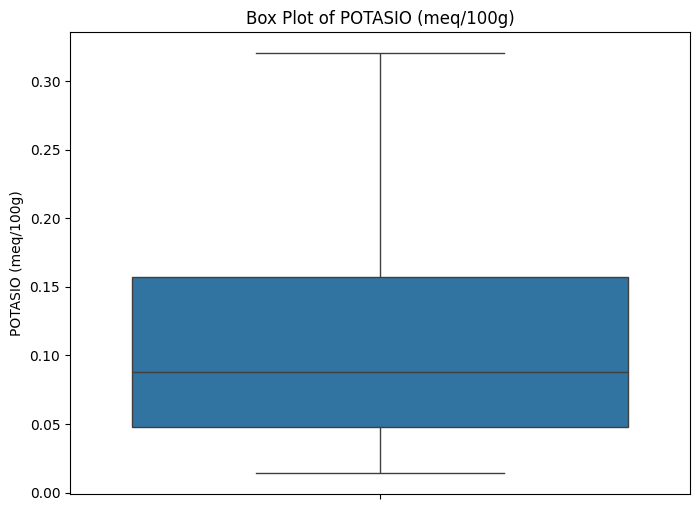

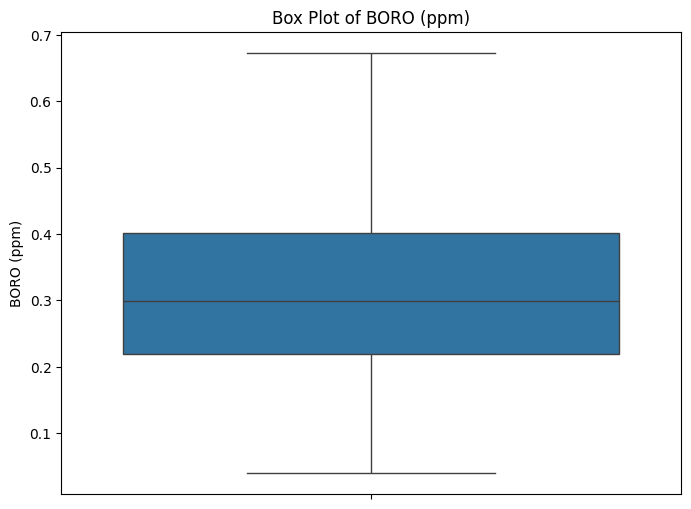

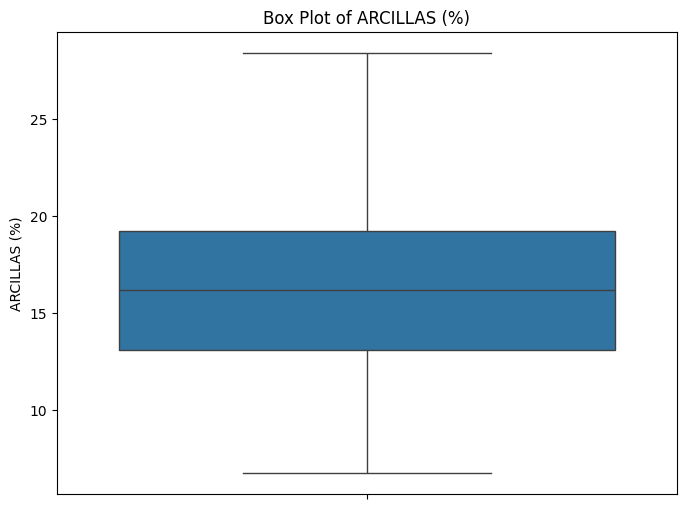

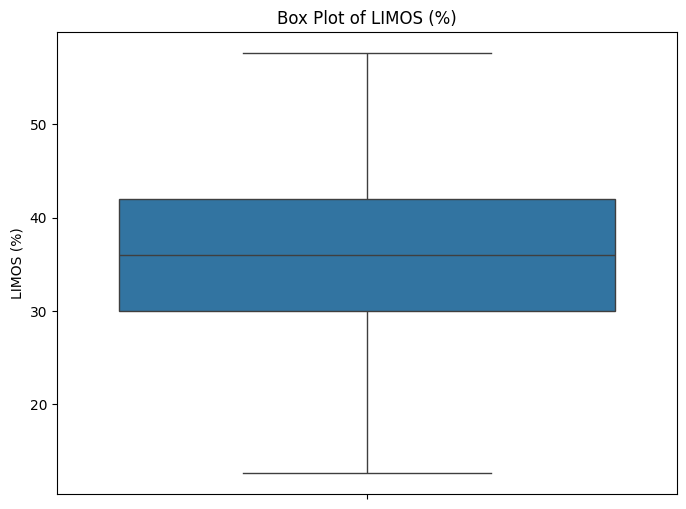

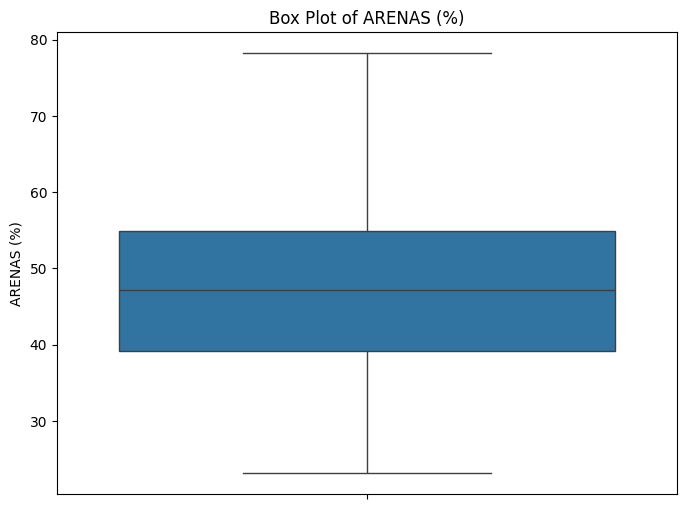

In [ ]:
for col in columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df_datos_colombia_clean[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

### **Conclusión del conjunto de datos soil Colombia:**
- No hay datos nulos
- Se elimina columnas que no son necesarias
- No Hay filas duplicadas

### **Estandarizar Nombres**

In [ ]:
df_soil_data_grevena_clean.columns = df_soil_data_grevena_clean.columns.str.lower()
df_soil_data_hugging_clean.columns = df_soil_data_hugging_clean.columns.str.lower()
df_datos_colombia_clean.columns = df_datos_colombia_clean.columns.str.lower()

In [ ]:
console.print(df_soil_data_grevena_clean.columns)
console.print(df_soil_data_hugging_clean.columns)
console.print(df_datos_colombia_clean.columns)
#

Index(['sand %', 'clay %', 'silt %', 'ph', 'o.m. %', 'caco3 %', 'p ppm',
       'k ppm ', 'mg ppm'],
      dtype='object')

Index(['ph', 'clay', 'organicmatter', 'boron', 'sand'], dtype='object')

Index(['ph (adimensional)', 'materia organica (%)',
       'fósforo por bray ii (ppm)', 'calcio (meq/100g)', 'magnesio (meq/100g)',
       'potasio (meq/100g)', 'boro (ppm)', 'arcillas (%)', 'limos (%)',
       'arenas (%)'],
      dtype='object')

In [ ]:
df_soil_data_grevena_clean = df_soil_data_grevena_clean.rename(columns={
    'sand %': 'arenas',
    'clay %': 'arcillas',
    'silt %': 'limos',
    'ph': 'ph',
    'o.m. %': 'materia organica',
    'caco3 %': 'calcio',
    'p ppm': 'fosforo',
    'k ppm ': 'potasio',
    'mg ppm': 'magnesio'
})

In [ ]:
df_soil_data_hugging_clean = df_soil_data_hugging_clean.rename(columns={
    'ph': 'ph',
    'clay': 'arcillas',
    'organicmatter': 'materia organica',
    'boron': 'boro',
    'sand': 'arenas',
})

In [ ]:
df_soil_data_hugging_clean['limos'] = 100 - (df_soil_data_hugging_clean['arenas'] + df_soil_data_hugging_clean['arcillas'])

In [ ]:
df_datos_colombia_clean = df_datos_colombia_clean.rename(columns={
    'ph (adimensional)': 'ph',
    'materia organica (%)': 'materia organica',
    'fósforo por bray ii (ppm)': 'fosforo',
    'calcio (meq/100g)': 'calcio',
    'magnesio (meq/100g)': 'magnesio',
    'potasio (meq/100g)': 'potasio',
    'boro (ppm)': 'boro',
    'arcillas (%)': 'arcillas',
    'limos (%)': 'limos',
    'arenas (%)': 'arenas',
})

In [ ]:
df_soil = pd.concat([df_soil_data_grevena_clean, df_soil_data_hugging_clean, df_datos_colombia_clean], ignore_index=True)

In [ ]:
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arenas            2523 non-null   float64
 1   arcillas          2523 non-null   float64
 2   limos             2523 non-null   float64
 3   ph                2523 non-null   float64
 4   materia organica  2523 non-null   float64
 5   calcio            1170 non-null   float64
 6   fosforo           1170 non-null   float64
 7   potasio           1170 non-null   float64
 8   magnesio          1170 non-null   float64
 9   boro              1742 non-null   float64
dtypes: float64(10)
memory usage: 197.2 KB


In [ ]:
df_soil.head(10)

,arenas,arcillas,limos,ph,materia organica,calcio,fosforo,potasio,magnesio,boro
0,42.0,38.0,20.0,5.162,3.540000,0.00,18.608840,147.0,1115.0,NaN
1,54.0,26.0,20.0,6.071,1.451688,0.00,31.355000,180.0,1055.0,NaN
2,28.0,36.0,36.0,6.921,1.767599,0.40,19.024525,183.0,1215.0,NaN
3,58.0,20.0,22.0,7.704,0.718322,6.80,6.276846,116.0,327.0,NaN
4,33.2,41.2,25.6,7.609,0.996625,4.39,6.553970,228.0,939.0,NaN
5,29.2,46.8,24.0,6.504,0.943973,0.00,14.313427,231.0,1979.0,NaN
6,37.2,34.8,28.0,6.466,2.358052,0.00,14.451988,183.0,1215.0,NaN
7,26.8,47.2,26.0,5.696,1.703664,0.00,12.096439,270.0,1047.0,NaN
8,29.2,44.8,26.0,6.056,2.200096,0.00,10.018013,210.0,1155.0,NaN
9,31.2,32.8,36.0,7.551,2.467117,8.71,4.891229,159.0,538.0,NaN


### **Calcular Columnas**

**Relación CaMg = Ca / Mg**

In [ ]:
# CaMg = Ca / Mg
df_soil['camg'] = df_soil['calcio'] / df_soil['magnesio']
df_soil.head()

,arenas,arcillas,limos,ph,materia organica,calcio,fosforo,potasio,magnesio,boro,camg
0,42.0,38.0,20.0,5.162,3.540000,0.00,18.608840,147.0,1115.0,NaN,0.000000
1,54.0,26.0,20.0,6.071,1.451688,0.00,31.355000,180.0,1055.0,NaN,0.000000
2,28.0,36.0,36.0,6.921,1.767599,0.40,19.024525,183.0,1215.0,NaN,0.000329
3,58.0,20.0,22.0,7.704,0.718322,6.80,6.276846,116.0,327.0,NaN,0.020795
4,33.2,41.2,25.6,7.609,0.996625,4.39,6.553970,228.0,939.0,NaN,0.004675


**Relación CaMgK = (Ca + Mg) / K**

In [ ]:
# camgk = (calcio + magnesio) / K
df_soil['camgk'] = (df_soil['calcio'] + df_soil['magnesio']) / df_soil['potasio']
df_soil.head()


,arenas,arcillas,limos,ph,materia organica,calcio,fosforo,potasio,magnesio,boro,camg,camgk
0,42.0,38.0,20.0,5.162,3.540000,0.00,18.608840,147.0,1115.0,NaN,0.000000,7.585034
1,54.0,26.0,20.0,6.071,1.451688,0.00,31.355000,180.0,1055.0,NaN,0.000000,5.861111
2,28.0,36.0,36.0,6.921,1.767599,0.40,19.024525,183.0,1215.0,NaN,0.000329,6.641530
3,58.0,20.0,22.0,7.704,0.718322,6.80,6.276846,116.0,327.0,NaN,0.020795,2.877586
4,33.2,41.2,25.6,7.609,0.996625,4.39,6.553970,228.0,939.0,NaN,0.004675,4.137675


**Calcular Clase Textural**
- Se toma según el triangulo del USDA
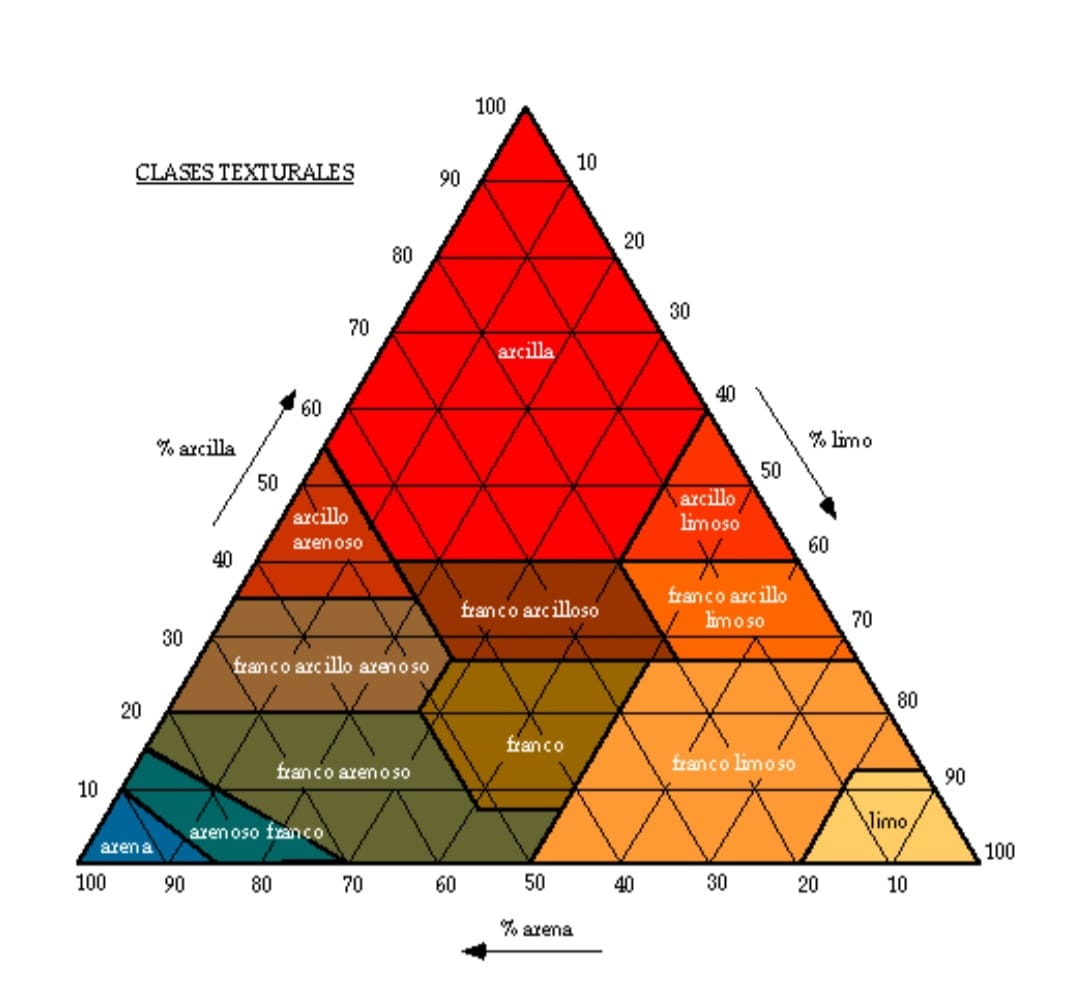

In [ ]:
def obtener_clase_textural(arcilla, limo, arena):
  """
  Determina la clase textural del suelo según el triángulo del USDA.

  Args:
    arcilla (float): Porcentaje de arcilla (0-100).
    limo (float): Porcentaje de limo (0-100).
    arena (float): Porcentaje de arena (0-100).

  Returns:
    str: El nombre de la clase textural en español o un mensaje de error.
  """
  # --- Validación de Entrada ---
  total = arcilla + limo + arena
  # Permite una pequeña tolerancia para errores de redondeo
  if not (99.0 <= total <= 101.0):
    return np.nan
  if not (0 <= arcilla <= 100 and 0 <= limo <= 100 and 0 <= arena <= 100):
    return np.nan

  # --- Lógica de Clasificación (basada en el triángulo USDA) ---

  # Clases con alto contenido de arcilla (Clay >= 40%)
  if arcilla >= 40:
    if limo >= 40:
      return "Arcillo Limoso" # Silty Clay
    elif arena >= 45:
       # Esta condición también cubre Clay >= 35 y Sand >= 45
       return "Arcillo Arenoso" # Sandy Clay
    else: # Si no es Limoso ni Arenoso, es Arcilla Pura (Clay >= 40, Silt < 40, Sand < 45)
      return "Arcilla" # Clay

  # Clases con arcilla media-alta (Clay 35-39.9%)
  elif arcilla >= 35 and arena >= 45:
      return "Arcillo Arenoso" # Sandy Clay (ya cubierto arriba si Clay>=40, aquí específico para 35-39.9)

  # Clases francas arcillosas (Clay 27-34.9%)
  elif arcilla >= 27: # y arcilla < 35 porque los casos >=35 ya se manejaron
      if limo >= 40 and arena <= 20 : # Priorizar limo >= 40 y arena baja
          return "Franco Arcillo Limoso" # Silty Clay Loam
      elif arena > 20 and arena < 45 : # limo < 40 implícito
          return "Franco Arcilloso" # Clay Loam
      elif arena >= 45:
           # Franco Arcillo Arenoso requiere Clay >= 20, así que entra aquí
           return "Franco Arcillo Arenoso" # Sandy Clay Loam
      else:
          # Podría caer aquí si Silt < 40 y Sand <= 20.
          # Verificar las fronteras: si Clay 27-35, Silt < 40, Sand <= 20.
          # Esto corresponde a la esquina superior izquierda de "Franco Arcilloso"
          # o la esquina inferior derecha de "Franco Arcillo Limoso".
          # La línea divisoria está en Silt=40 y Sand=20.
          # Si Silt>=28 (para ser Loam) y Sand <= 20, probablemente Franco Arcillo Limoso o Franco Arcilloso
          if limo >= 28: # Condición mínima de limo para clases Loam
              # Si limo >= 40 ya se cubrió, así que aquí limo es 28-39.9 y sand <= 20
              # Esto cae dentro de Franco Arcilloso según la definición estándar
              # Pero visualmente está cerca de Franco Arcillo Limoso. La línea es Sand=20.
              # Si sand == 20, está en la línea. Usemos la condición limo>=40 como decisiva.
              # Si limo < 40 y sand <= 20, debería ser Franco Arcilloso.
               return "Franco Arcilloso" # Clay Loam
          else:
               # Si Silt < 28, Sand <= 20, Clay 27-35 -> No es una clase común, revisar triángulo
               # Esta zona no debería existir si los porcentajes suman 100.
               return np.nan


  # Franco Arcillo Arenoso (Clay 20-26.9% y Sand >= 45)
  elif arcilla >= 20 and arena >= 45:
       # y arcilla < 27 porque los casos >=27 ya se manejaron
       # limo < 28 implícito
       return "Franco Arcillo Arenoso" # Sandy Clay Loam

  # Clases Limosas (Silt >= 50% o >= 80%)
  elif limo >= 80 and arcilla < 12:
    return "Limo" # Silt
  elif (limo >= 50 and arcilla >= 12 and arcilla < 27) or \
       (limo >= 50 and limo < 80 and arcilla < 12):
    # y arcilla < 27 porque casos >=27 ya se manejaron
    return "Franco Limoso" # Silt Loam

  # Clase Franco (Loam)
  elif arcilla >= 7 and arcilla < 27 and limo >= 28 and limo < 50 and arena <= 52:
     # y arena <= 52 porque Sandy Loam tiene arena > 52
     return "Franco" # Loam

  # Clases Arenosas (Sand alto)
  elif arena >= 85 and (limo + 1.5 * arcilla) < 15: # Definición más precisa de Arena
      return "Arena" # Sand
  elif arena >= 70 and arena < 85 and (limo + 2 * arcilla) < 30 : # Definición más precisa de Arenoso Franco
      # y arcilla < 15 y limo < 30 (aproximadamente del triángulo)
      return "Arenoso Franco" # Loamy Sand
  elif (arcilla >= 7 and arcilla < 20 and arena > 52) or \
       (arcilla < 7 and limo < 50 and arena >= 43 and arena <= 52):
       # y arcilla < 20 porque casos >=20 ya se manejaron (excepto Loam)
       # y arena > 52 porque Loam tiene <= 52 (en la primera parte)
       # La segunda parte cubre una pequeña área abajo a la izquierda de Loam
       return "Franco Arenoso" # Sandy Loam

  # Si ninguna de las condiciones anteriores se cumple (puede indicar un punto en una línea o un error lógico)
  else:
    return np.nan

In [ ]:
columns_to_round = ['arenas', 'arcillas', 'limos']  # Replace with your actual column names

for column in columns_to_round:
  if column in df_soil.columns:
    df_soil[column] = df_soil[column].round(2)
  else:
    print(f"Warning: Column '{column}' not found in the DataFrame.")

In [ ]:
df_soil['clase_textural'] = df_soil.apply(lambda row: obtener_clase_textural(row['arcillas'], row['limos'], row['arenas']), axis=1)
df_soil.head()

,arenas,arcillas,limos,ph,materia organica,calcio,fosforo,potasio,magnesio,boro,camg,camgk,clase_textural
0,42.0,38.0,20.0,5.162,3.540000,0.00,18.608840,147.0,1115.0,NaN,0.000000,7.585034,Franco Arcilloso
1,54.0,26.0,20.0,6.071,1.451688,0.00,31.355000,180.0,1055.0,NaN,0.000000,5.861111,Franco Arcillo Arenoso
2,28.0,36.0,36.0,6.921,1.767599,0.40,19.024525,183.0,1215.0,NaN,0.000329,6.641530,Franco Arcilloso
3,58.0,20.0,22.0,7.704,0.718322,6.80,6.276846,116.0,327.0,NaN,0.020795,2.877586,Franco Arcillo Arenoso
4,33.2,41.2,25.6,7.609,0.996625,4.39,6.553970,228.0,939.0,NaN,0.004675,4.137675,Arcilla


In [ ]:
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arenas            2523 non-null   float64
 1   arcillas          2523 non-null   float64
 2   limos             2523 non-null   float64
 3   ph                2523 non-null   float64
 4   materia organica  2523 non-null   float64
 5   calcio            1170 non-null   float64
 6   fosforo           1170 non-null   float64
 7   potasio           1170 non-null   float64
 8   magnesio          1170 non-null   float64
 9   boro              1742 non-null   float64
 10  camg              1170 non-null   float64
 11  camgk             1170 non-null   float64
 12  clase_textural    2475 non-null   object 
dtypes: float64(12), object(1)
memory usage: 256.4+ KB


In [ ]:
df_soil["clase_textural"].unique()

array(['Franco Arcilloso', 'Franco Arcillo Arenoso', 'Arcilla', 'Franco',
       'Franco Arcillo Limoso', 'Franco Limoso', 'Arcillo Limoso', nan,
       'Franco Arenoso'], dtype=object)

### **Se calcula el DB Ideal**
- Basado en la sgte tabla

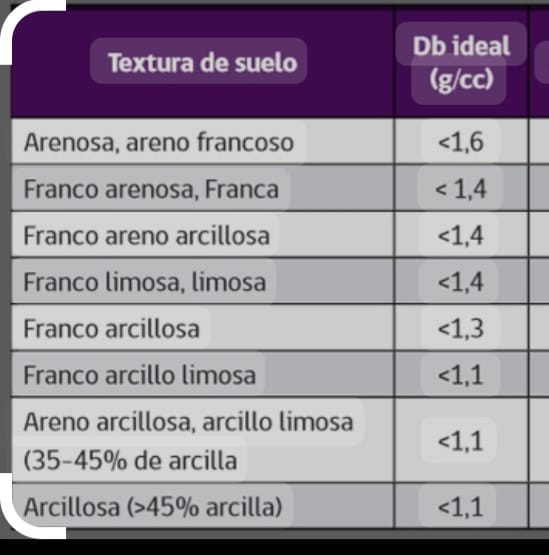


In [ ]:
def obtener_db_ideal(clase_textural):
  db_map = {
      "Arena": 1.6,
      "Franco Arcilloso": 1.3,
      "Franco Arcillo Arenoso": 1.4,
      "Arcilla": 1.0,
      "Franco": 1.4,
      "Franco Arcillo Limoso": 1.1,
      "Franco Limoso": 1.4,
      "Arcillo Limoso": 1.1,
      "Franco Arenoso": 1.4,
      "Arenoso Franco": 1.3,
      "Limo": 1.4,
  }

  db_ideal = db_map.get(clase_textural)

  if db_ideal:
    return db_ideal
  else:
    np.nan

In [ ]:
df_soil['da'] = df_soil['clase_textural'].apply(obtener_db_ideal)
df_soil.head()

,arenas,arcillas,limos,ph,materia organica,calcio,fosforo,potasio,magnesio,boro,camg,camgk,clase_textural,da
0,42.0,38.0,20.0,5.162,3.540000,0.00,18.608840,147.0,1115.0,NaN,0.000000,7.585034,Franco Arcilloso,1.3
1,54.0,26.0,20.0,6.071,1.451688,0.00,31.355000,180.0,1055.0,NaN,0.000000,5.861111,Franco Arcillo Arenoso,1.4
2,28.0,36.0,36.0,6.921,1.767599,0.40,19.024525,183.0,1215.0,NaN,0.000329,6.641530,Franco Arcilloso,1.3
3,58.0,20.0,22.0,7.704,0.718322,6.80,6.276846,116.0,327.0,NaN,0.020795,2.877586,Franco Arcillo Arenoso,1.4
4,33.2,41.2,25.6,7.609,0.996625,4.39,6.553970,228.0,939.0,NaN,0.004675,4.137675,Arcilla,1.0


In [ ]:
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arenas            2523 non-null   float64
 1   arcillas          2523 non-null   float64
 2   limos             2523 non-null   float64
 3   ph                2523 non-null   float64
 4   materia organica  2523 non-null   float64
 5   calcio            1170 non-null   float64
 6   fosforo           1170 non-null   float64
 7   potasio           1170 non-null   float64
 8   magnesio          1170 non-null   float64
 9   boro              1742 non-null   float64
 10  camg              1170 non-null   float64
 11  camgk             1170 non-null   float64
 12  clase_textural    2475 non-null   object 
 13  da                2475 non-null   float64
dtypes: float64(13), object(1)
memory usage: 276.1+ KB


### **Se calcula el Nitrogeno Disponible**
- N = MateriaOrganica * 30 * Da * 0.05 * 10

In [ ]:
df_soil['nitrogeno_disponible'] = df_soil['materia organica'] * 30 * df_soil['da'] * 0.05 * 10
df_soil['nitrogeno_disponible'] = df_soil['nitrogeno_disponible'].round(2)
df_soil.head()

,arenas,arcillas,limos,ph,materia organica,calcio,fosforo,potasio,magnesio,boro,camg,camgk,clase_textural,da,nitrogeno_disponible
0,42.0,38.0,20.0,5.162,3.540000,0.00,18.608840,147.0,1115.0,NaN,0.000000,7.585034,Franco Arcilloso,1.3,69.03
1,54.0,26.0,20.0,6.071,1.451688,0.00,31.355000,180.0,1055.0,NaN,0.000000,5.861111,Franco Arcillo Arenoso,1.4,30.49
2,28.0,36.0,36.0,6.921,1.767599,0.40,19.024525,183.0,1215.0,NaN,0.000329,6.641530,Franco Arcilloso,1.3,34.47
3,58.0,20.0,22.0,7.704,0.718322,6.80,6.276846,116.0,327.0,NaN,0.020795,2.877586,Franco Arcillo Arenoso,1.4,15.08
4,33.2,41.2,25.6,7.609,0.996625,4.39,6.553970,228.0,939.0,NaN,0.004675,4.137675,Arcilla,1.0,14.95


### **Cargamos los datos al DataWareHouse BigQuery**

In [ ]:
table_ref = client.dataset(dataset_name).table(table_name)
job_config = bigquery.LoadJobConfig(write_disposition='WRITE_TRUNCATE') # Sobrescribe la tabla si ya existe

job = client.load_table_from_dataframe(df_soil, table_ref, job_config=job_config)
job.result()

console.print(f'Se cargaron los datos a Bigquery')

Se cargaron los datos a Bigquery